# Анализ оттока клиентов банка

Необходимо провести исследование клиентов регионального банка «Метанпромбанк» и выделите сегменты пользователей,
которые склонны уходить из банка. 


**Цели проекта:**

*Шаг 1. Открытие данных.*


*Шаг 2. Проверка данных.*

- 2.1 Переработка данных

- 2.2 Кодирование данных

- 2.3 Поиск дубликатов


*Шаг 3. EDA*

- 3.1 Анализ распределения дискретных признаков в разрезе оттонка

- 3.1.1 Посчитаем уровень оттока для банка в целом.

- 3.1.2 Посмотрим на количество мужчин и женщин в разрезе оттока

- 3.1.3 Посмотрим процент оттока по городам

- 3.1.4 Посмотрим процент оттока по активности клиентов

- 3.1.5 Посмотрим процент оттока по наличию у клиентов кредитной карты

- 3.2 Проведем анализ непрерывных переменных и определим интервалы для разбивки по группам.

- 3.3 Составим на основе выбранных групп для непрерывных признаков графики сегментов в разрезе оттока.

- 3.3.1 Оценка баланса

- 3.3.2 Оценка запрлаты

- 3.3.3 Анализ кредитного счета

- 3.3.4 Анализ баллов собственности

- 3.3.5 Анализ количества продуктов банка у клиентов

- 3.3.6 Анализ возраста клиентов в разрезе оттока.

- Вывод по блоку


*Шаг 4. Проверка гипотез*

- 4.1 Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

- 4.2 Проверим гипотезу различия в среднем возрасте между теми, которые ушли и теми, которые остались.

*Шаг 5. Подведение промежуточных итогов*

*Шаг 6. Сегментация клиентов по критериям*

*Шаг 7. Приоритизация  сегментов* 

*Шаг 8. Рекомендации и выводы*



1. [Открытие данных](#1)

2. [Предобработка данных](#2)

    * [Кодирование переменных](#3)
    
    * [Обработка дубликатов](#4)
    
    
3. [Шаг 3. EDA](#5)

    * [Анализ распределения дискретных признаков в разрезе оттонка](#6)
    
    * [Посчитаем уровень оттока для банка в целом](#7)
    
    * [Посмотрим на количество мужчин и женщин в разрезе оттока](#8)
    
    * [Посмотрим процент оттока по городам](#9)
    
    * [Посмотрим процент оттока по активности клиентов](#10)
    
    * [Посмотрим процент оттока по наличию у клиентов кредитной карты](#11)
    
    * [Проведем анализ непрерывных переменных и определим интервалы для разбивки по группам](#12)
    
    * [Оценка баланса](#13)
    
    * [Оценка запрлаты](#14)
    
    * [Анализ кредитного счета](#15)
    
    * [Анализ баллов собственности](#16)
    
    * [Анализ количества продуктов банка у клиентов](#17)
    
    * [Анализ возраста клиентов в разрезе оттока](#18)
    
    * [Вывод по блоку](#19)
    
        
4. [Шаг 4. Проверка гипотез](#20)

    * [Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались](#21)
    
    * [Проверим гипотезу различия в среднем возрасте между теми, которые ушли и теми, которые остались](#22)
    
    
5. [Шаг 5. Подведение промежуточных итогов](#23)

6. [Шаг 6. Сегментация клиентов по критериям](#24)
   
   * [Сегмент 1](#25)
   
   * [Сегмент 2](#26)
   
   * [Сегмент 3](#27)
   
   * [Сегмент 4](#28)
   

7. [Шаг 7. Приоритизация  сегментов](#29)

8. [Шаг 8. Рекомендации и выводы](#30)

# Шаг 1.Открытие данных  <a id="1"></a>

In [1]:
!pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
from plotly import graph_objects as go
import plotly.express as px
import warnings
import numpy as np
from scipy import stats
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
data = pd.read_csv('/datasets/bank_scrooge.csv',sep=',')
data.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
5,202305,856.00,Рыбинск,М,56.00,4,863687.24,3,1,0,156619.80,0
6,177259,807.00,Ярославль,Ж,39.00,3,405042.44,3,0,1,103838.32,0
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0
8,211686,923.00,Ярославль,М,54.00,5,1206337.87,2,1,0,155371.79,0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,238055.53,0


# Шаг 2. Переработка данных<a id="2"></a> 

**2.1 Обработка данных и пропуски** 

In [4]:
data = data.rename(columns={'USERID': 'user_id','EST_SALARY': 'est_salary'})
data['score'] = data['score'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [5]:
def pass_value_barh(dfg):
    try:
        (
              (dfg.isna().mean()*100)
              .to_frame()
              .rename(columns = {0:'space'})
              .query('space > 0')
              .sort_values(by = 'space', ascending = True)
              .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
              .set_title('Процент пропусков в данных'+ "\n", fontsize = 22, color = 'steelblue')
        );
        
    
        
    except:
        print('Пропусков не осталось или произошла ошибка в первой части функции.')

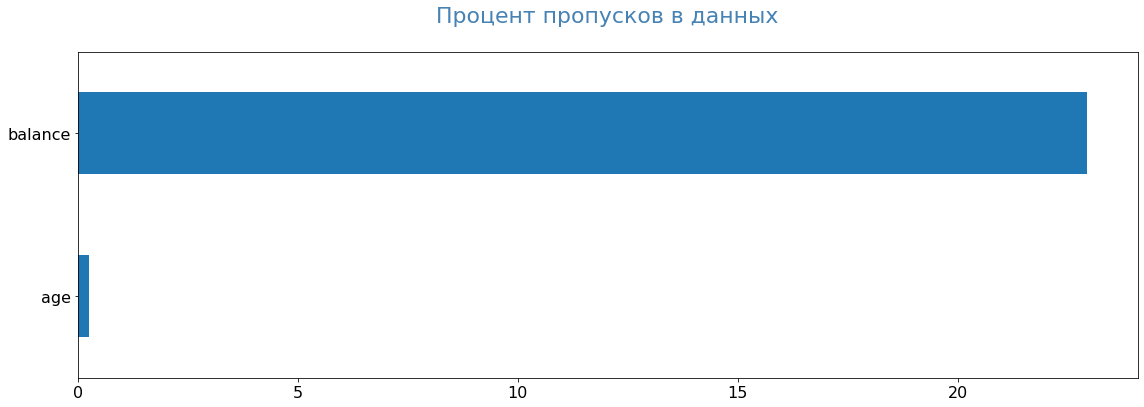

In [6]:
pass_value_barh(data)

In [7]:
data['age'].isna().sum()

26

Пропусков по возрасту мало,26, и по природе они относятся к MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными. Пропуски случайны и мы никак не можем их заполнить, поэтому их можно смело удалить, на общую картину это не повлияет.

In [8]:
data = data.dropna(subset=['age'])
data['age'] = data['age'].astype(int) # приведем пропуски к целым числам

Рассмотрим пропуски в графе баланс более подробно. Их много, поэтому для начала надо решить, зависят ли они от других данных, и после этого решить, к какому типу они относятся. Введем новый столбец, который указывает, если ли пропуске в балансе, или нет. И на основе этого столбца сделаем 3 таблицы, которые покажут, если ли разница между группами с пропусками или нет на другие данные.

In [9]:
data['missing_flag'] = data['balance'].isnull().astype(int)
data.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_flag
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0


In [10]:
pivot_table_1 = pd.pivot_table(data=data, index='missing_flag',  \
                             values=['age', 'est_salary'], aggfunc=['mean', 'median']).round(1)
pivot_table_1[('relative_difference', 'age_%')] = ((pivot_table_1[('mean', 'age')][1]  \
                                        - pivot_table_1[('mean', 'age')][0]) / pivot_table_1[('mean', 'age')][0]).round(2)*100
pivot_table_1[('relative_difference', 'est_salary_%')] = ((pivot_table_1[('mean', 'est_salary')][1]  \
                                                        - pivot_table_1[('mean', 'est_salary')][0])  \
                                                         / pivot_table_1[('mean', 'est_salary')][0]).round(2)*100
pivot_table_1

mean            median            relative_difference  \
               age est_salary    age est_salary               age_%   
missing_flag                                                          
0            42.90  124520.40     40  106250.20               -2.00   
1            42.10  226345.40     40  174347.90               -2.00   

                           
             est_salary_%  
missing_flag               
0                   82.00  
1                   82.00

В среднем, разница между группами по возрасту незначительна, 2 процента. Значит зависимости пропуском от возраста нет. А вот от зарплаты процент большой, 82 процента разница в зарплате между группами. Значит, зависимость пропусков от зарплаты есть.

In [11]:
pivot_table_2 = pd.pivot_table(data=data, index='missing_flag',  \
                             values=['products', 'equity'], aggfunc=['mean', 'median']).round(1)
pivot_table_2[('relative_difference', 'equity_%')] = ((pivot_table_2[('median', 'equity')][1]  \
                                    - pivot_table_2[('median', 'equity')][0]) / pivot_table_2[('median', 'equity')][0]).round(2)*100
pivot_table_2[('relative_difference', 'products_%')] = ((pivot_table_2[('median', 'products')][1]  \
                                                        - pivot_table_2[('median', 'products')][0])  \
                                                         / pivot_table_2[('median', 'products')][0]).round(2)*100
pivot_table_2

mean          median          relative_difference           
             equity products equity products            equity_% products_%
missing_flag                                                               
0              3.40     2.10      4        2             -100.00     -50.00
1              0.10     1.20      0        1             -100.00     -50.00

В данной таблицы мы сравниваем медиану количества продуктом, чем пользуются люди, и количеством объектов собственности, что есть у клиентов. В данном случае, разница между группами по возрасту значительна для каждого пункта, 50 и 100 проценто соотвественно. Значит зависимость пропусков от кол-ва продуктов и кол-ва собственности есть.

In [12]:
pivot_table_3 = data.groupby('missing_flag').agg(mode_city=('city', lambda x: x.mode().iloc[0]), 
                                                 mode_age=('gender', lambda x: x.mode().iloc[0])).round(1)
pivot_table_3

,mode_city,mode_age
missing_flag,,
0,Ярославль,Ж
1,Ярославль,М


Судя по моде по городу, наиболее часть встречается город Ярославль в обоих случаях. Значит, пропуски не влияет на эту графу. А вот по полу мода разная, так что пропуски влияют на этот столбец.

Как видно по результатам таблиц, пропуски влияют на другие данные, и в некоторых случаях довольно сильно. Поэтому пропуски было решено отнести к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
Поэтому пропуски в графе баланс мы оставляем.

**2.2 Кодирование переменных** <a id="3"></a> 

In [13]:
data['gender_cat'] = data['gender']
data['city_cat'] = data['city']

In [14]:
data_encoded = pd.get_dummies(data, drop_first=True, columns=['city_cat','gender_cat'])
data_encoded

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_flag,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,1,0,1
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,1,0,1,1
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,1,0,1,1
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,0,1,0


Самые популярные города это Рыбинск и Ярославль. Ростов же появляется в таблице в сочитании 0-0 для двух других городов.

**2.3 Обработка дубликатов** <a id="4"></a> 

In [15]:
data_encoded.duplicated().sum()

0

In [16]:
data_encoded.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 9974, dtype: bool

In [17]:
data_encoded[['user_id','score','city','age','equity']].duplicated().sum()

0

In [18]:
data_encoded.duplicated(subset=['user_id'], keep=False).sum()

100

In [19]:
duplicates = data_encoded[data_encoded.duplicated(subset=['user_id'], keep=False)]
duplicates.sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_flag,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,0,1,0,0
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,1,0,1,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,0,1,0,0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,1,0,1,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0,0,1,0,0
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1,0,0,1,1
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0,1,1,0,0
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,0,1,0,1


In [20]:
data_encoded.drop('missing_flag', axis=1, inplace=True)
data_encoded.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,1


Удалим промежуточный столбец.

Как видно по результатам данных, дубликаты в графе user_id появляются, но по сути они отображают реальных клиентов. Под одним номером находятся два разных человека. Поэтому удалить дубликаты мы не можем.

Была проведена обработка данных, устанены деффекты которые можно, и таблица была приведена в готовый к анализу вид.

# Шаг 3. EDA. <a id="5"></a> 

**3.1 Анализ распределения дискретных признаков в разрезе оттонка** <a id="6"></a> 

In [21]:
data_encoded.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,1,0,1
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,0,1,0
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,0,1,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,1,1
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,0,1,0


**3.1.1 Посчитаем уровень оттока для банка в целом.** <a id="7"></a> 

In [22]:
total_customers = len(data)  # Общее количество клиентов
churned_customers = len(data[data['churn'] == 1])  # Количество клиентов, покинувших банк
churn_rate = ((churned_customers / total_customers)*100) # Доля оттока
churn_rate

18.237417284940847

**3.1.2 Посмотрим на количество мужчин и женщин в разрезе оттока** <a id="8"></a> 

In [23]:
# Получение общего количества мужчин и женщин
total_gender_counts = data_encoded.groupby('gender')['user_id'].count().reset_index()
total_gender_counts.columns = ['gender', 'total_count']

# Подсчет количества пользователей по полу и оттоку
data_gender_churn_1 = data_encoded.groupby(['gender', 'churn'])['user_id'].count().reset_index()
data_gender_churn_1.columns = ['gender', 'churn', 'count']

# Объединение данных с общим количеством
data_gender_churn_1 = data_gender_churn_1.merge(total_gender_counts, on='gender', how='left')


data_gender_churn_1['percent_of_churn_from_total'] = ((data_gender_churn_1['count'] / 
                                                       data_gender_churn_1['total_count'])*100).round(1)
data_gender_churn_1

,gender,churn,count,total_count,percent_of_churn_from_total
0,Ж,0,4347,4983,87.20
1,Ж,1,636,4983,12.80
2,М,0,3808,4991,76.30
3,М,1,1183,4991,23.70


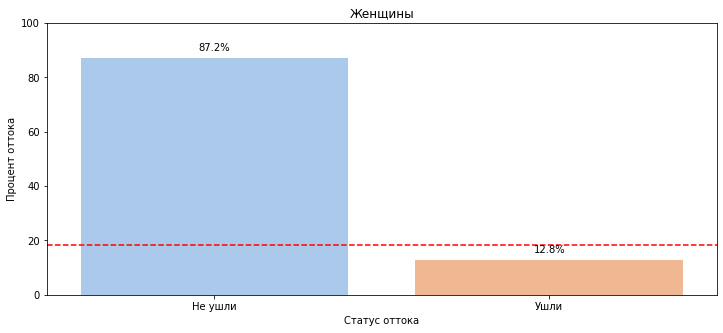

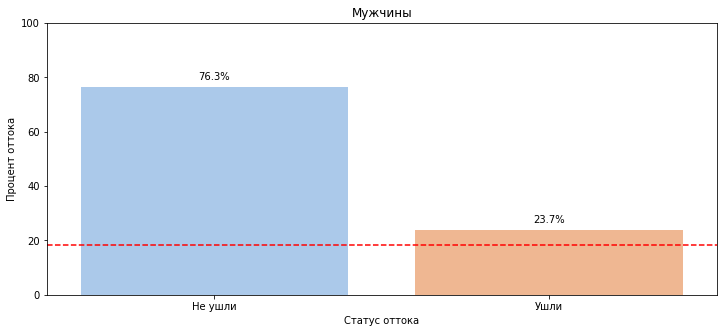

In [24]:
# Извлечение данных для мужчин и женщин
female_data = data_gender_churn_1[data_gender_churn_1['gender'] == 'Ж']
male_data = data_gender_churn_1[data_gender_churn_1['gender'] == 'М']

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Женщины
sns.barplot(x=['Не ушли', 'Ушли'], y=female_data['percent_of_churn_from_total'], palette='pastel')
plt.title('Женщины')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

for index, value in enumerate(female_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


# Создание бар-графика для мужчин
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')
# Мужчины
sns.barplot(x=['Не ушли', 'Ушли'], y=male_data['percent_of_churn_from_total'], palette='pastel')
plt.title('Мужчины')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(male_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.show()


Как видно по графику, процент ушедших среди мужчин выше, чем среди женщин. 23,7 против 12.8 процентов. На это стоит обратить внимание при дальнейшем анализе.

**3.1.3 Посмотрим процент оттока по городам** <a id="9"></a> 

In [25]:
# Получение общего количества мужчин и женщин
total_city_counts = data_encoded.groupby('city')['user_id'].count().reset_index()
total_city_counts.columns = ['city', 'total_count']

# Подсчет количества пользователей по полу и оттоку
data_city_churn = data_encoded.groupby(['city', 'churn'])['user_id'].count().reset_index()
data_city_churn.columns = ['city', 'churn', 'count']

# Объединение данных с общим количеством
data_city_churn = data_city_churn.merge(total_city_counts, on='city', how='left')

# Вывод результирующего DataFrame
data_city_churn['percent_of_churn_from_total'] = ((data_city_churn['count'] / 
                                                       data_city_churn['total_count'])*100).round(1)
data_city_churn

,city,churn,count,total_count,percent_of_churn_from_total
0,Ростов,0,1151,1416,81.30
1,Ростов,1,265,1416,18.70
2,Рыбинск,0,2246,2683,83.70
3,Рыбинск,1,437,2683,16.30
4,Ярославль,0,4758,5875,81.00
5,Ярославль,1,1117,5875,19.00


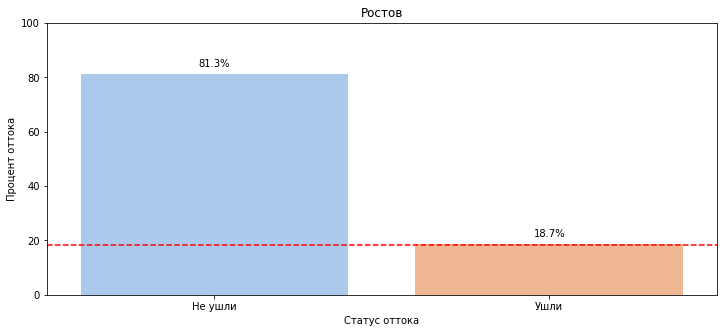

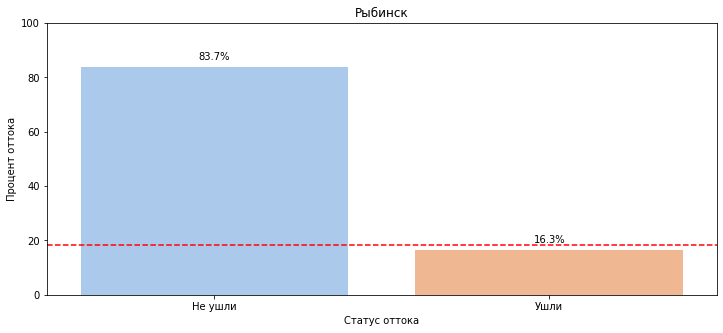

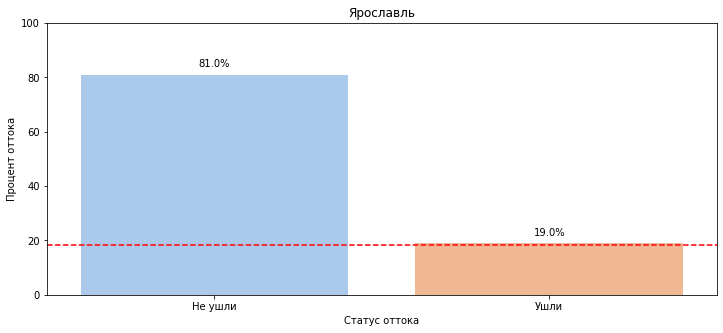

In [26]:

rostov_data = data_city_churn[data_city_churn['city'] == 'Ростов']
ribinsk_data = data_city_churn[data_city_churn['city'] == 'Рыбинск']
yaroslavl_data = data_city_churn[data_city_churn['city'] == 'Ярославль']

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Ростов
sns.barplot(x=['Не ушли', 'Ушли'], y=rostov_data['percent_of_churn_from_total'], palette='pastel')
plt.title('Ростов')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(rostov_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Рыбинск
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')
# Мужчины
sns.barplot(x=['Не ушли', 'Ушли'], y=ribinsk_data['percent_of_churn_from_total'], palette='pastel')
plt.title('Рыбинск')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(ribinsk_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Ярославль
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')
# Мужчины
sns.barplot(x=['Не ушли', 'Ушли'], y=yaroslavl_data['percent_of_churn_from_total'], palette='pastel')
plt.title('Ярославль')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(yaroslavl_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

По городам процент оттока практически идентичен. Лидирует Ярославль с 19 процентами.

**3.1.4 Посмотрим процент оттока по активности клиентов** <a id="10"></a> 

In [27]:
total_activity_counts = data_encoded.groupby('last_activity')['user_id'].count().reset_index()
total_activity_counts.columns = ['last_activity', 'total_count']

# Подсчет количества пользователей по полу и оттоку
data_activity_count = data_encoded.groupby(['last_activity', 'churn'])['user_id'].count().reset_index()
data_activity_count.columns = ['last_activity', 'churn', 'count']

# Объединение данных с общим количеством
data_activity_count = data_activity_count.merge(total_activity_counts, on='last_activity', how='left')

# Вывод результирующего DataFrame
data_activity_count['percent_of_churn_from_total'] = ((data_activity_count['count'] / 
                                                       data_activity_count['total_count'])*100).round(1)
data_activity_count

,last_activity,churn,count,total_count,percent_of_churn_from_total
0,0,0,4217,4759,88.60
1,0,1,542,4759,11.40
2,1,0,3938,5215,75.50
3,1,1,1277,5215,24.50


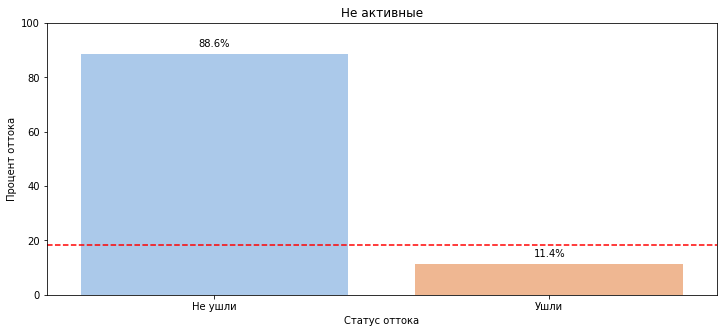

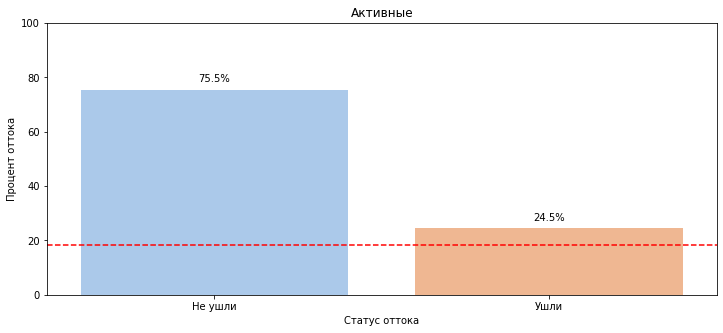

In [28]:

non_acivity_data = data_activity_count[data_activity_count['last_activity'] == 0]
acivity_data = data_activity_count[data_activity_count['last_activity'] == 1]


# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных
sns.barplot(x=['Не ушли', 'Ушли'], y=non_acivity_data['percent_of_churn_from_total'], palette='pastel')
plt.title('Не активные')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(non_acivity_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Для активных
sns.barplot(x=['Не ушли', 'Ушли'], y=acivity_data['percent_of_churn_from_total'], palette='pastel')
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')
plt.title('Активные')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(acivity_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.show()

Активные клиенты уходят чаще, чем не активные. Процент оттока 24,5 процента. 

**3.1.5 Посмотрим процент оттока по наличию у клиентов кредитной карты** <a id="11"></a> 

In [29]:

total_сс_counts = data_encoded.groupby('credit_card')['user_id'].count().reset_index()
total_сс_counts.columns = ['credit_card', 'total_count']

# Подсчет количества пользователей по полу и оттоку
data_credit_card_count = data_encoded.groupby(['credit_card', 'churn'])['user_id'].count().reset_index()
data_credit_card_count.columns = ['credit_card', 'churn', 'count']

# Объединение данных с общим количеством
data_credit_card_count = data_credit_card_count.merge(total_сс_counts, on='credit_card', how='left')

# Вывод результирующего DataFrame
data_credit_card_count['percent_of_churn_from_total'] = ((data_credit_card_count['count'] / 
                                                       data_credit_card_count['total_count'])*100).round(1)
data_credit_card_count

,credit_card,churn,count,total_count,percent_of_churn_from_total
0,0,0,2374,3190,74.40
1,0,1,816,3190,25.60
2,1,0,5781,6784,85.20
3,1,1,1003,6784,14.80


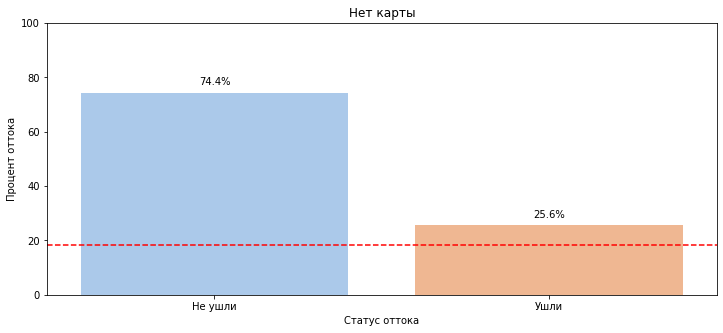

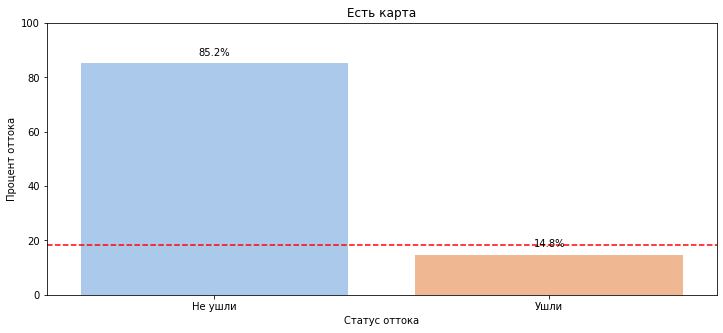

In [30]:
non_сс_data = data_credit_card_count[data_credit_card_count['credit_card'] == 0]
сс_data = data_credit_card_count[data_credit_card_count['credit_card'] == 1]


# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных
sns.barplot(x=['Не ушли', 'Ушли'], y=non_сс_data['percent_of_churn_from_total'], palette='pastel')
plt.title('Нет карты')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(non_сс_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.figure(figsize=(12, 5))
# Для активных
sns.barplot(x=['Не ушли', 'Ушли'], y=сс_data['percent_of_churn_from_total'], palette='pastel')
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')
plt.title('Есть карта')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(сс_data['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.show()

Те, кто не имеет кредитной карты, покидают банк чаще, чем те, кто ее имеет. 25,6 процентов отток клиентов, это больше чем средний по банку в 18 процентов, стоит обратить внимание.

**3.2 Проведем анализ непрерывных переменных и определим интервалы для разбивки по группам.** <a id="12"></a> 

Были введены ограничения на баланс на счете, а так же на зарплату, чтобы привести распередления к нормальному виду, и убрать выбросы

In [31]:
data_encoded['balance'].describe()

count        7695.00
mean       827245.59
std       1980327.41
min             0.00
25%        295698.71
50%        524295.33
75%        980051.21
max     119113552.01
Name: balance, dtype: float64

In [32]:
# Удаляем пропущенные значения из столбца 'balance'
cleaned_balance = data_encoded['balance'].dropna()
percentile_balance_95 = np.percentile(cleaned_balance, 95)
percentile_balance_95.round(2)

2114078.39

In [33]:
data_encoded['est_salary'].describe()

count      9974.00
mean     147786.81
std      139285.51
min        2546.30
25%       75251.66
50%      119626.79
75%      174499.81
max     1395064.45
Name: est_salary, dtype: float64

In [34]:
percentile_salary_95 = np.percentile(data_encoded['est_salary'], 95)
percentile_salary_95.round(2)

316360.58

Используем полученные пороговые значения для ограничения выборки.

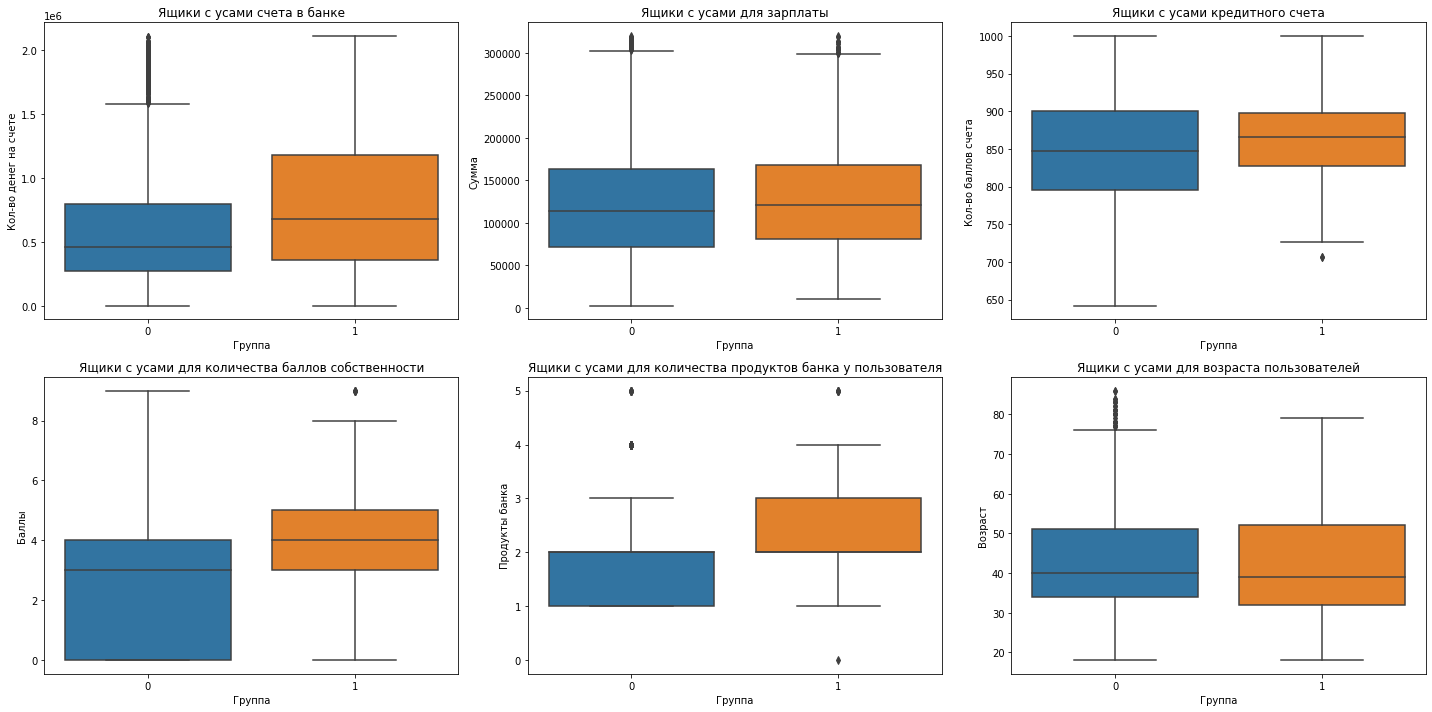

In [35]:
plt.figure(figsize=(20, 10))

# Построение ящиков с усами для признака balance
plt.subplot(2, 3, 1)
sns.boxplot(x='churn', y='balance', data=data_encoded.query('balance <= 2115000'))
plt.title('Ящики с усами счета в банке')
plt.xlabel('Группа')
plt.ylabel('Кол-во денег на счете')

# Построение ящиков с усами для признака est_salary
plt.subplot(2, 3, 2)
sns.boxplot(x='churn', y='est_salary', data=data_encoded.query('est_salary <= 320000'))
plt.title('Ящики с усами для зарплаты')
plt.xlabel('Группа')
plt.ylabel('Сумма')

# Построение ящиков с усами для признака score
plt.subplot(2, 3, 3)
sns.boxplot(x='churn', y='score', data=data_encoded)
plt.title('Ящики с усами кредитного счета')
plt.xlabel('Группа')
plt.ylabel('Кол-во баллов счета')

# Построение ящиков с усами для признака equity
plt.subplot(2, 3, 4)
sns.boxplot(x='churn', y='equity', data=data_encoded)
plt.title('Ящики с усами для количества баллов собственности')
plt.xlabel('Группа')
plt.ylabel('Баллы')

# Добавление ящиков с усами для признака products
plt.subplot(2, 3, 5)
sns.boxplot(x='churn', y='products', data=data_encoded)
plt.title('Ящики с усами для количества продуктов банка у пользователя')
plt.xlabel('Группа')
plt.ylabel('Продукты банка')

# Добавление ящиков с усами для признака age
plt.subplot(2, 3, 6)
sns.boxplot(x='churn', y='age', data=data_encoded)
plt.title('Ящики с усами для возраста пользователей')
plt.xlabel('Группа')
plt.ylabel('Возраст')

plt.tight_layout()
plt.show()

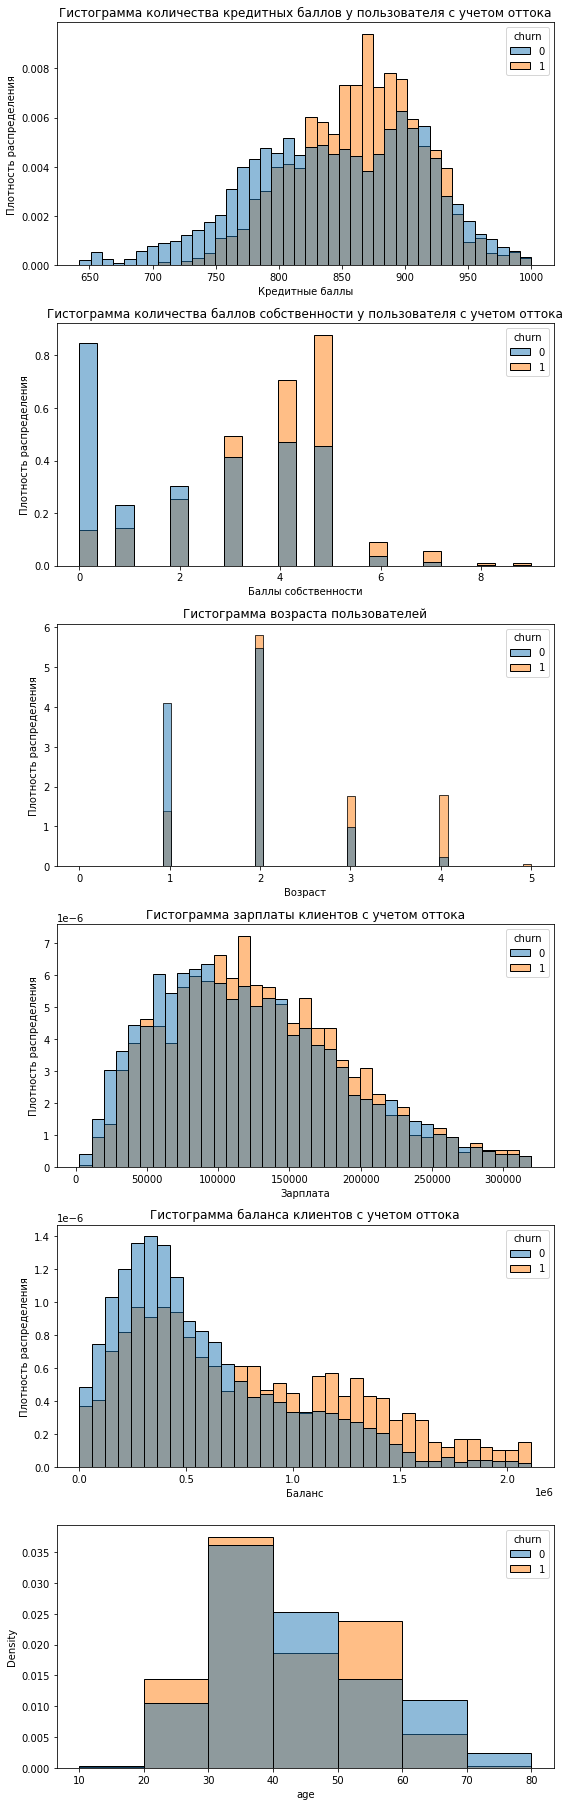

In [36]:
# Создание общей фигуры и осей для всех графиков
fig, axs = plt.subplots(6, 1, figsize=(8, 25))

# Построение гистограммы для кредитных баллов
sns.histplot(data=data_encoded, x='score', hue='churn', stat='density', common_norm=False, ax=axs[0])
axs[0].set_title('Гистограмма количества кредитных баллов у пользователя с учетом оттока')
axs[0].set_xlabel('Кредитные баллы')
axs[0].set_ylabel('Плотность распределения')

# Построение гистограммы для баллов собственности
sns.histplot(data=data_encoded, x='equity', hue='churn', stat='density', common_norm=False, ax=axs[1])
axs[1].set_title('Гистограмма количества баллов собственности у пользователя с учетом оттока')
axs[1].set_xlabel('Баллы собственности')
axs[1].set_ylabel('Плотность распределения')

# Построение гистограммы для количества продуктов банка
sns.histplot(data=data_encoded, x='products', hue='churn', stat='density', common_norm=False, ax=axs[2])
axs[2].set_title('Гистограмма количества продуктов банка у пользователя с учетом оттока')
axs[2].set_xlabel('Продукты банка')
axs[2].set_ylabel('Плотность распределения')

# Гистограмму для зарплаты
sns.histplot(data=data_encoded.query('est_salary <=320000'), x='est_salary', hue='churn', stat='density', common_norm=False, ax=axs[3])
axs[3].set_title('Гистограмма зарплаты клиентов с учетом оттока')
axs[3].set_xlabel('Зарплата')
axs[3].set_ylabel('Плотность распределения')

sns.histplot(data=data_encoded.query('balance <=2115000'), x='balance', hue='churn', stat='density', common_norm=False, ax=axs[4])
axs[4].set_title('Гистограмма баланса клиентов с учетом оттока')
axs[4].set_xlabel('Баланс')
axs[4].set_ylabel('Плотность распределения')
plt.tight_layout()

bins = range(10, 90, 10)
sns.histplot(data=data_encoded, x='age', hue='churn', stat='density', common_norm=False,bins=bins, ax=axs[5])
axs[2].set_title('Гистограмма возраста пользователей')
axs[2].set_xlabel('Возраст')
axs[2].set_ylabel('Плотность распределения')


plt.show()

На основе данных графиков было принято решение поделить признаки, исходя из графиков оттока клиентов и перцентилей, что изображены на графике ящик с усами. За нижнюю отметку были приняты значения ниже 25 процентного перцентиля, за среднюю от 25 процентного до 75 процентного, все что от 75 до края верхнего уса за последний сегмент. Иногда, если встречаются выбросы, их сделали еще одной категорией, та, что выше верхнего уса. 



In [37]:
data_encoded.query('churn ==1')['balance'].describe()

count       1806.00
mean     1134458.21
std      2034445.55
min            6.00
25%       387482.16
50%       783908.90
75%      1348127.55
max     64866210.15
Name: balance, dtype: float64

In [38]:
percentile_balance_25 = np.nanpercentile(data_encoded.query('churn ==1')['balance'].astype(float), 25).round(2)
percentile_balance_25

387482.16

In [39]:
percentile_balance_75 = np.nanpercentile(data_encoded.query('churn ==1')['balance'].astype(float), 75).round(2)
percentile_balance_75

1348127.55

In [40]:
percentile_balance_95 = np.nanpercentile(data_encoded.query('churn ==1')['balance'].astype(float), 95).round(2)
percentile_balance_95

2996295.68

In [41]:
def balance_category(balance):
    if balance <= percentile_balance_25:
        return 'низкий'
    elif percentile_balance_25 < balance <= percentile_balance_75:
        return 'средний'
    elif percentile_balance_75 < balance <= percentile_balance_95:
        return 'высокий'
    elif balance > percentile_balance_95:
        return 'очень высокий'
    
data_encoded['balance_category'] = data_encoded['balance'].apply(balance_category)   
data_encoded.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,низкий
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,средний
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,None
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0,высокий
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,1,низкий


In [42]:
data_encoded.query('churn ==1')['est_salary'].describe()

count      1819.00
mean     148289.70
std      122932.16
min       10880.27
25%       83196.61
50%      125395.22
75%      175985.39
max     1263028.49
Name: est_salary, dtype: float64

In [43]:
percentile_salary_25 = np.percentile(data_encoded.query('churn ==1')['est_salary'], 25).round(2)
percentile_salary_25

83196.61

In [44]:
percentile_salary_75 = np.percentile(data_encoded.query('churn ==1')['est_salary'], 75).round(2)
percentile_salary_75

175985.38

In [45]:
percentile_salary_95 = np.percentile(data_encoded.query('churn ==1')['est_salary'], 95).round(2)
percentile_salary_95

304044.81

In [46]:
def salary_category(salary):
    if salary <= percentile_salary_25:
        return 'низкий'
    elif percentile_salary_25 < salary <= percentile_salary_75:
        return 'средний'
    elif percentile_salary_75 < salary <= percentile_salary_95:
        return 'высокий'
    elif salary > percentile_salary_95:
        return 'очень высокий'
    
data_encoded['salary_category'] = data_encoded['est_salary'].apply(salary_category)   
data_encoded.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,низкий,низкий
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,средний,средний
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,None,средний
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0,высокий,средний
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,1,низкий,низкий


In [47]:
data_encoded.query('churn ==1')['score'].describe()

count   1819.00
mean     863.42
std       49.62
min      706.00
25%      828.00
50%      866.00
75%      898.00
max     1000.00
Name: score, dtype: float64

In [48]:
percentile_score_25 = np.percentile(data_encoded.query('churn ==1')['score'], 25).round(2)
percentile_score_25

828.0

In [49]:
percentile_score_75 = np.percentile(data_encoded.query('churn ==1')['score'], 75).round(2)
percentile_score_75

898.0

In [50]:
score_max =data_encoded.query('churn ==1')['score'].max().round(2)
score_max

1000

In [51]:
def score_category(score):
    if score <= percentile_score_25:
        return 'низкий'
    elif percentile_score_25 < score <= percentile_score_75:
        return 'средний'
    elif percentile_score_75 < score <= score_max:
        return 'высокий'
    
    
data_encoded['score_category'] = data_encoded['score'].apply(score_category)   
data_encoded.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,низкий,низкий,средний
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,средний,средний,средний
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,None,средний,средний
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0,высокий,средний,средний
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,1,низкий,низкий,низкий


In [52]:
data_encoded.query('churn ==1')['equity'].describe()

count   1819.00
mean       3.76
std        1.59
min        0.00
25%        3.00
50%        4.00
75%        5.00
max        9.00
Name: equity, dtype: float64

In [53]:
percentile_equity_25 = np.percentile(data_encoded.query('churn ==1')['equity'], 25)
percentile_equity_25

3.0

In [54]:
percentile_equity_75 = np.percentile(data_encoded.query('churn ==1')['equity'], 75).round(2)
percentile_equity_75

5.0

In [55]:
percentile_equity_95 = np.percentile(data_encoded.query('churn ==1')['equity'], 95).round(2)
percentile_equity_95

6.0

In [56]:
def equity_category(equity):
    if equity <= percentile_equity_25:
        return 'низкий'
    elif percentile_equity_25 < equity <= percentile_equity_75:
        return 'средний'
    elif percentile_equity_75 < equity <= percentile_equity_95:
        return 'высокий'
    elif equity > percentile_equity_95:
        return 'очень высокий'
    
data_encoded['equity_category'] = data_encoded['equity'].apply(equity_category)   
data_encoded.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category,equity_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,низкий,низкий,средний,низкий
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,средний,средний,средний,средний
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,None,средний,средний,низкий
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0,высокий,средний,средний,средний
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,1,низкий,низкий,низкий,средний


In [57]:
data_encoded.query('churn ==1')['age'].describe()

count   1819.00
mean      41.45
std       11.18
min       18.00
25%       32.00
50%       39.00
75%       52.00
max       79.00
Name: age, dtype: float64

In [58]:
percentile_age_25 = np.percentile(data_encoded.query('churn ==1')['age'], 25)
percentile_age_25

32.0

In [59]:
percentile_age_75 = np.percentile(data_encoded.query('churn ==1')['age'], 75)
percentile_age_75

52.0

In [60]:
def age_category(age):
    if age <= percentile_age_25:
        return 'молодые'
    elif percentile_age_25< age <= percentile_age_75:
        return 'зрелые'
    elif age > percentile_age_75:
        return 'пожилые'
    
    
data_encoded['age_category'] = data_encoded['age'].apply(age_category)   
data_encoded.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category,equity_category,age_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,низкий,низкий,средний,низкий,молодые
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,средний,средний,средний,средний,зрелые
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,None,средний,средний,низкий,молодые
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,1,0,высокий,средний,средний,средний,зрелые
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,1,низкий,низкий,низкий,средний,зрелые


In [61]:
data_encoded.query('churn ==1')['products'].describe()

count   1819.00
mean       2.38
std        0.92
min        0.00
25%        2.00
50%        2.00
75%        3.00
max        5.00
Name: products, dtype: float64

In [62]:
percentile_products_25 = np.percentile(data_encoded.query('churn ==1')['products'], 25)
percentile_products_25

2.0

In [63]:
percentile_products_75 = np.percentile(data_encoded.query('churn ==1')['products'], 75)
percentile_products_75

3.0

In [64]:
def product_category(product):
    if product <= percentile_products_25:
        return 'низкий'
    elif percentile_products_25 < product <= percentile_products_75:
        return 'средний'
    elif product > percentile_products_75:
        return 'высокий'
    
    
data_encoded['product_category'] = data_encoded['products'].apply(product_category)   
data_encoded.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category,equity_category,age_category,product_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,1,1,0,0,низкий,низкий,средний,низкий,молодые,низкий
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,1,0,0,средний,средний,средний,средний,зрелые,средний
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,...,0,1,0,0,None,средний,средний,низкий,молодые,низкий
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,1,0,1,0,высокий,средний,средний,средний,зрелые,низкий
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,1,0,1,1,низкий,низкий,низкий,средний,зрелые,низкий


**3.3 Составим на основе выбранных групп для непрерывных признаков графики сегментов в разрезе оттока.**

**3.3.1 Оценка баланса** <a id="13"></a> 

In [65]:
total_balance_counts_low = data_encoded.query('balance_category == "низкий"')['user_id'].count()
data_balance_low = data_encoded.query('balance_category == "низкий"').groupby(['churn'])['user_id'].count().reset_index()
data_balance_low.columns = ['churn', 'count']
data_balance_low['total_amount'] = total_balance_counts_low
data_balance_low['percent_of_churn_from_total'] = ((data_balance_low['count'] / 
                                                       total_balance_counts_low)*100).round(1)
data_balance_low

,churn,count,total_amount,percent_of_churn_from_total
0,0,2367,2819,84.00
1,1,452,2819,16.00


In [66]:
total_balance_counts_med = data_encoded.query('balance_category == "средний"')['user_id'].count()
data_balance_med = data_encoded.query('balance_category == "средний"').groupby(['churn'])['user_id'].count().reset_index()
data_balance_med.columns = ['churn', 'count']
data_balance_med['total_amount'] = total_balance_counts_med
data_balance_med['percent_of_churn_from_total'] = ((data_balance_med['count'] / 
                                                       total_balance_counts_med)*100).round(1)
data_balance_med

,churn,count,total_amount,percent_of_churn_from_total
0,0,2986,3888,76.80
1,1,902,3888,23.20


In [67]:
total_balance_counts_hi = data_encoded.query('balance_category == "высокий"')['user_id'].count()
data_balance_hi = data_encoded.query('balance_category == "высокий"').groupby(['churn'])['user_id'].count().reset_index()
data_balance_hi.columns = ['churn', 'count']
data_balance_hi['total_amount'] = total_balance_counts_hi
data_balance_hi['percent_of_churn_from_total'] = ((data_balance_hi['count'] / 
                                                       total_balance_counts_hi)*100).round(1)
data_balance_hi

,churn,count,total_amount,percent_of_churn_from_total
0,0,427,788,54.20
1,1,361,788,45.80


In [68]:
total_balance_counts_vhi = data_encoded.query('balance_category == "очень высокий"')['user_id'].count()
data_balance_vhi = data_encoded.query('balance_category == "очень высокий"').groupby(['churn'])['user_id'].count().reset_index()
data_balance_vhi.columns = ['churn', 'count']
data_balance_vhi['total_amount'] = total_balance_counts_vhi
data_balance_vhi['percent_of_churn_from_total'] = ((data_balance_vhi['count'] / 
                                                       total_balance_counts_vhi)*100).round(1)
data_balance_vhi

,churn,count,total_amount,percent_of_churn_from_total
0,0,109,200,54.50
1,1,91,200,45.50


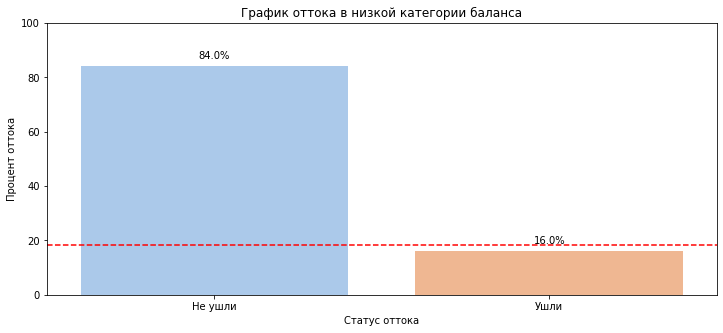

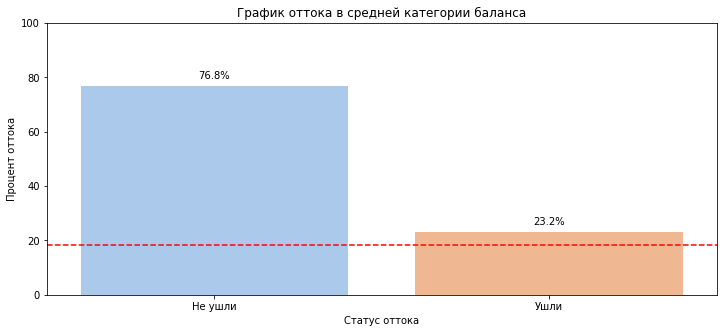

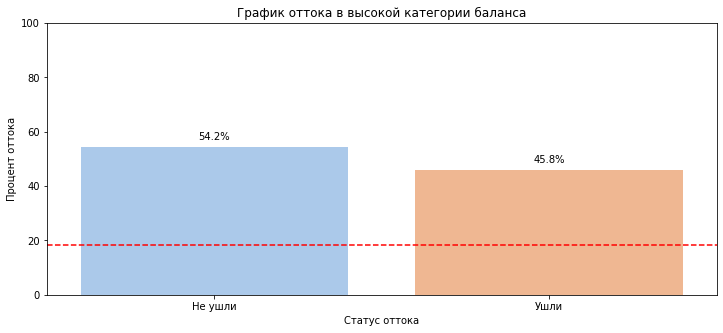

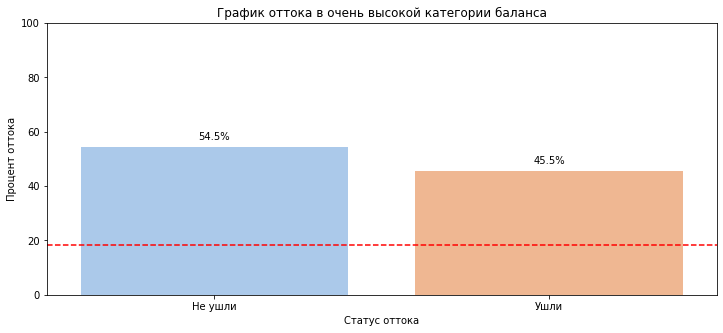

In [69]:
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в низкой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_balance_low['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока в низкой категории баланса')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100) # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_balance_low['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в средней категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_balance_med['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока в средней категории баланса')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100) # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_balance_med['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_balance_hi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока в высокой категории баланса')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100) # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_balance_hi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в очень высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_balance_vhi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока в очень высокой категории баланса')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100) # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_balance_vhi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

Больше всего людей уходя в категории баланса очень высокой, порядка 45 процентов. В высокой категории процент так же равен 45 процентам, что тоже очень много. В средней 23 процента оттока.

**3.3.2 Оценка запрлаты** <a id="14"></a> 

In [70]:
total_salary_counts_low = data_encoded.query('salary_category == "низкий"')['user_id'].count()
data_salary_low = data_encoded.query('salary_category == "низкий"').groupby(['churn'])['user_id'].count().reset_index()
data_salary_low.columns = ['churn', 'count']
data_salary_low['total_amount'] = total_salary_counts_low
data_salary_low['percent_of_churn_from_total'] = ((data_salary_low['count'] / 
                                                       total_salary_counts_low)*100).round(1)
data_salary_low

,churn,count,total_amount,percent_of_churn_from_total
0,0,2494,2949,84.60
1,1,455,2949,15.40


In [71]:
total_salary_counts_med = data_encoded.query('salary_category == "средний"')['user_id'].count()
data_salary_med = data_encoded.query('salary_category == "средний"').groupby(['churn'])['user_id'].count().reset_index()
data_salary_med.columns = ['churn', 'count']
data_salary_med['total_amount'] = total_salary_counts_med
data_salary_med['percent_of_churn_from_total'] = ((data_salary_med['count'] / 
                                                       total_salary_counts_med)*100).round(1)
data_salary_med

,churn,count,total_amount,percent_of_churn_from_total
0,0,3684,4593,80.20
1,1,909,4593,19.80


In [72]:
total_salary_counts_hi = data_encoded.query('salary_category == "высокий"')['user_id'].count()
data_salary_hi = data_encoded.query('salary_category == "высокий"').groupby(['churn'])['user_id'].count().reset_index()
data_salary_hi.columns = ['churn', 'count']
data_salary_hi['total_amount'] = total_salary_counts_hi
data_salary_hi['percent_of_churn_from_total'] = ((data_salary_hi['count'] / 
                                                       total_salary_counts_hi)*100).round(1)
data_salary_hi

,churn,count,total_amount,percent_of_churn_from_total
0,0,1518,1882,80.70
1,1,364,1882,19.30


In [73]:
total_salary_counts_vhi = data_encoded.query('salary_category == "очень высокий"')['user_id'].count()
data_salary_vhi = data_encoded.query('salary_category == "очень высокий"').groupby(['churn'])['user_id'].count().reset_index()
data_salary_vhi.columns = ['churn', 'count']
data_salary_vhi['total_amount'] = total_salary_counts_vhi
data_salary_vhi['percent_of_churn_from_total'] = ((data_salary_vhi['count'] / 
                                                       total_salary_counts_vhi)*100).round(1)
data_salary_vhi

,churn,count,total_amount,percent_of_churn_from_total
0,0,459,550,83.50
1,1,91,550,16.50


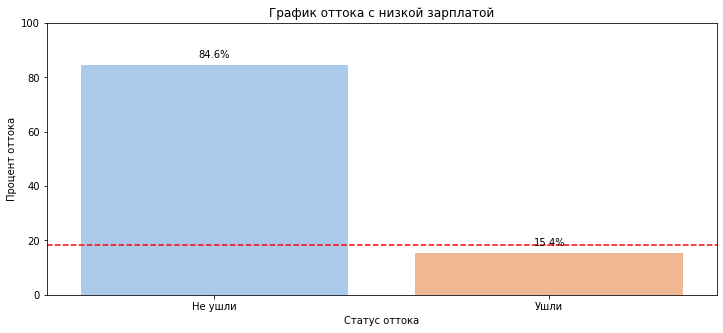

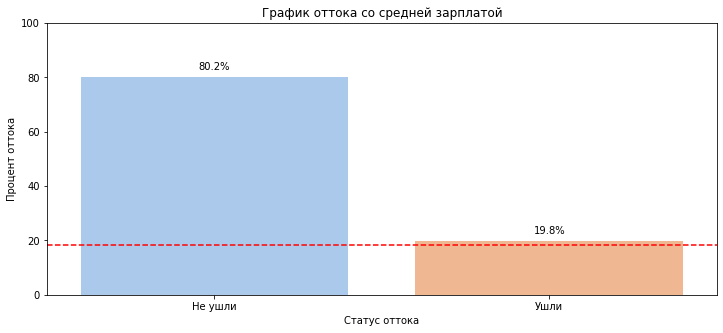

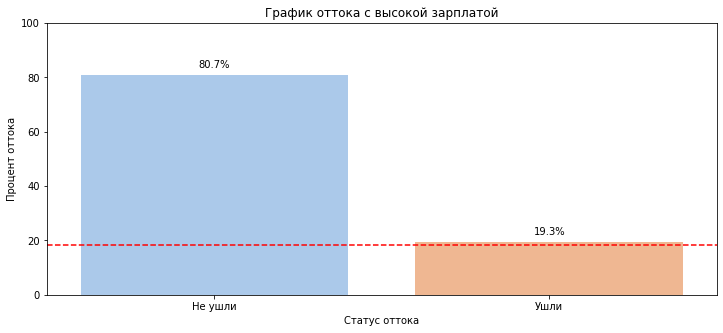

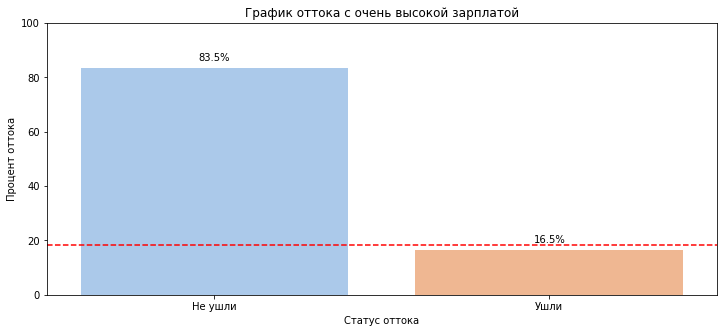

In [74]:
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в низкой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_salary_low['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с низкой зарплатой')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_salary_low['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в средней категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_salary_med['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока со средней зарплатой')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_salary_med['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_salary_hi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с высокой зарплатой')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_salary_hi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в очень высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_salary_vhi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с очень высокой зарплатой')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_salary_vhi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

Самой отточной областью по зарплате является средняя и высокая категории, 19 процентов в каждой графе.

**3.3.3  Анализ кредитного счета** <a id="15"></a> 

In [75]:
total_score_counts_low = data_encoded.query('score_category == "низкий"')['user_id'].count()
data_score_low = data_encoded.query('score_category == "низкий"').groupby(['churn'])['user_id'].count().reset_index()
data_score_low .columns = ['churn', 'count']
data_score_low ['total_amount'] = total_score_counts_low
data_score_low ['percent_of_churn_from_total'] = ((data_score_low ['count'] / 
                                                       total_score_counts_low)*100).round(1)
data_score_low

,churn,count,total_amount,percent_of_churn_from_total
0,0,3342,3800,87.90
1,1,458,3800,12.10


In [76]:
total_score_counts_med = data_encoded.query('score_category == "средний"')['user_id'].count()
data_score_med = data_encoded.query('score_category == "средний"').groupby(['churn'])['user_id'].count().reset_index()
data_score_med.columns = ['churn', 'count']
data_score_med['total_amount'] = total_score_counts_med
data_score_med['percent_of_churn_from_total'] = ((data_score_med['count'] / 
                                                       total_score_counts_med)*100).round(1)
data_score_med

,churn,count,total_amount,percent_of_churn_from_total
0,0,2693,3604,74.70
1,1,911,3604,25.30


In [77]:
total_score_counts_hi = data_encoded.query('score_category == "высокий"')['user_id'].count()
data_score_hi = data_encoded.query('score_category == "высокий"').groupby(['churn'])['user_id'].count().reset_index()
data_score_hi .columns = ['churn', 'count']
data_score_hi['total_amount'] = total_score_counts_hi
data_score_hi['percent_of_churn_from_total'] = ((data_score_hi['count'] / 
                                                       total_score_counts_hi)*100).round(1)
data_score_hi

,churn,count,total_amount,percent_of_churn_from_total
0,0,2120,2570,82.50
1,1,450,2570,17.50


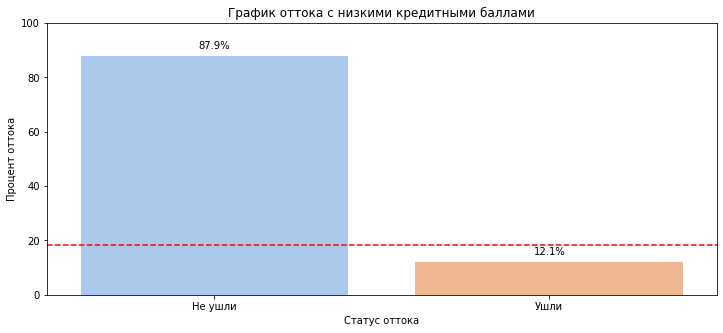

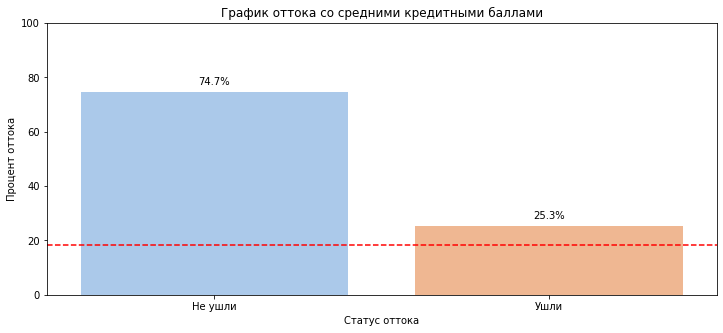

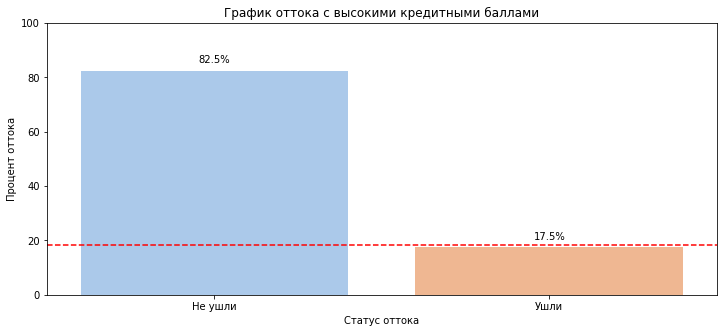

In [78]:
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в низкой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_score_low['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с низкими кредитными баллами')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_score_low['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в средней категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_score_med['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока со средними кредитными баллами')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_score_med['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_score_hi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с высокими кредитными баллами')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_score_hi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


Отточная область это средняя категория, там отток 25 процентов.

**3.3.4 Анализ баллов собственности** <a id="16"></a> 

In [79]:
total_equity_counts_low = data_encoded.query('equity_category == "низкий"')['user_id'].count()
data_equity_low = data_encoded.query('equity_category == "низкий"').groupby(['churn'])['user_id'].count().reset_index()
data_equity_low .columns = ['churn', 'count']
data_equity_low ['total_amount'] = total_equity_counts_low 
data_equity_low ['percent_of_churn_from_total'] = ((data_equity_low ['count'] / 
                                                       total_equity_counts_low)*100).round(1)
data_equity_low

,churn,count,total_amount,percent_of_churn_from_total
0,0,5270,5941,88.70
1,1,671,5941,11.30


In [80]:
total_equity_counts_hi = data_encoded.query('equity_category == "высокий"')['user_id'].count()
total_equity_counts_hi

161

In [81]:
total_equity_counts_med = data_encoded.query('equity_category == "средний"')['user_id'].count()
data_equity_med = data_encoded.query('equity_category == "средний"').groupby(['churn'])['user_id'].count().reset_index()
data_equity_med.columns = ['churn', 'count']
data_equity_med['total_amount'] = total_equity_counts_med
data_equity_med['percent_of_churn_from_total'] = ((data_equity_med['count'] / 
                                                       total_equity_counts_med)*100).round(1)
data_equity_med

,churn,count,total_amount,percent_of_churn_from_total
0,0,2722,3762,72.40
1,1,1040,3762,27.60


In [82]:
total_equity_counts_hi = data_encoded.query('equity_category == "высокий"')['user_id'].count()
data_equity_hi = data_encoded.query('equity_category == "высокий"').groupby(['churn'])['user_id'].count().reset_index()
data_equity_hi .columns = ['churn', 'count']
data_equity_hi['total_amount'] = total_equity_counts_hi
data_equity_hi['percent_of_churn_from_total'] = ((data_equity_hi['count'] / 
                                                       total_equity_counts_hi)*100).round(1)
data_equity_hi

,churn,count,total_amount,percent_of_churn_from_total
0,0,103,161,64.00
1,1,58,161,36.00


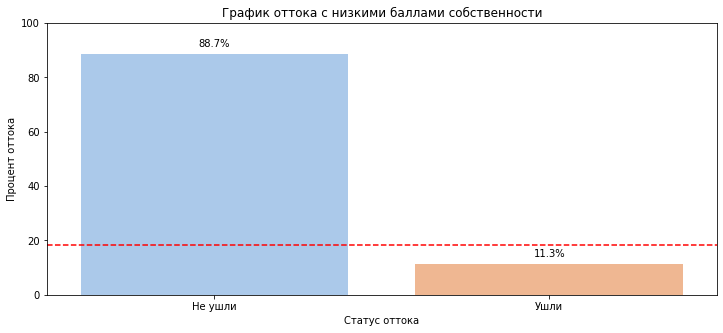

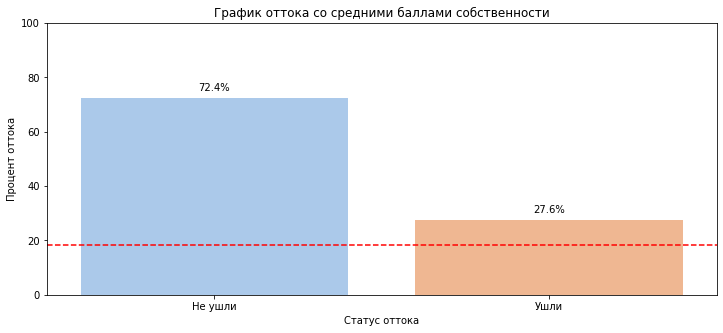

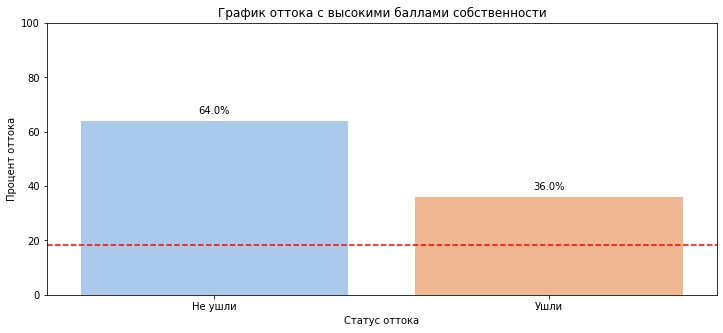

In [83]:
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в низкой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_equity_low['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с низкими баллами собственности')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_equity_low['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в средней категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_equity_med['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока со средними баллами собственности')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_equity_med['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_equity_hi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с высокими баллами собственности')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_equity_hi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


Уходят люди со средними и выше баллами собственности, в средней 27 процентов, в высокой 36 процентов.

**3.3.5 Анализ количества продуктов банка у клиентов** <a id="17"></a> 

In [84]:
total_products_counts_low = data_encoded.query('product_category == "низкий"')['user_id'].count()
data_products_low = data_encoded.query('product_category == "низкий"').groupby(['churn'])['user_id'].count().reset_index()
data_products_low .columns = ['churn', 'count']
data_products_low['total_amount'] = total_products_counts_low
data_products_low['percent_of_churn_from_total'] = ((data_products_low['count'] / 
                                                       total_products_counts_low)*100).round(1)
data_products_low

,churn,count,total_amount,percent_of_churn_from_total
0,0,7229,8443,85.60
1,1,1214,8443,14.40


In [85]:
total_products_counts_med = data_encoded.query('product_category == "средний"')['user_id'].count()
data_products_med = data_encoded.query('product_category == "средний"').groupby(['churn'])['user_id'].count().reset_index()
data_products_med .columns = ['churn', 'count']
data_products_med['total_amount'] = total_products_counts_med
data_products_med['percent_of_churn_from_total'] = ((data_products_med['count'] / 
                                                       total_products_counts_med)*100).round(1)
data_products_med

,churn,count,total_amount,percent_of_churn_from_total
0,0,741,1038,71.40
1,1,297,1038,28.60


In [86]:
total_products_counts_hi = data_encoded.query('product_category == "высокий"')['user_id'].count()
data_products_hi = data_encoded.query('product_category == "высокий"').groupby(['churn'])['user_id'].count().reset_index()
data_products_hi .columns = ['churn', 'count']
data_products_hi['total_amount'] = total_products_counts_hi
data_products_hi['percent_of_churn_from_total'] = ((data_products_hi['count'] / 
                                                       total_products_counts_hi)*100).round(1)
data_products_hi

,churn,count,total_amount,percent_of_churn_from_total
0,0,185,493,37.50
1,1,308,493,62.50


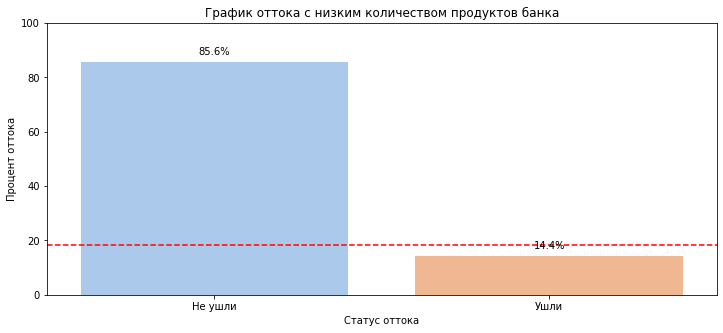

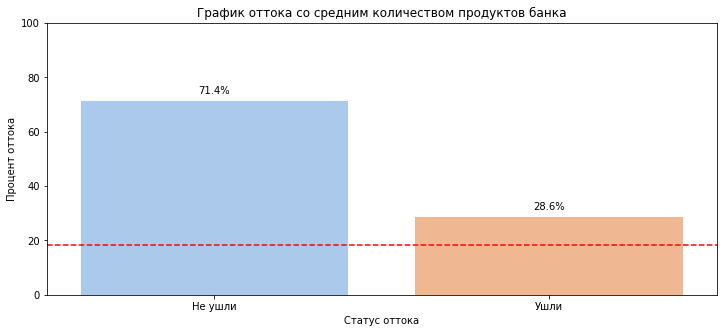

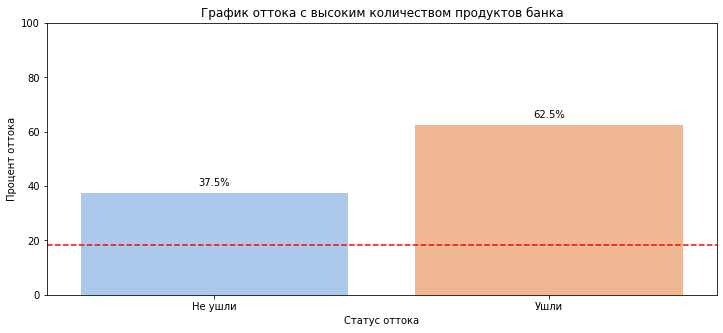

In [87]:
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в низкой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_products_low['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с низким количеством продуктов банка')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_products_low['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в средней категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_products_med['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока со средним количеством продуктов банка')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_products_med['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_products_hi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока с высоким количеством продуктов банка')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_products_hi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.show()

Уходят люди со средним и высоким количеством продуктов банка, в среднем 26,5 процентов, в высокой 62.5 процента.

**3.3.6 Анализ возраста клиентов в разрезе оттока.** <a id="18"></a> 

In [88]:
total_age_counts_low = data_encoded.query('age_category == "молодые"')['user_id'].count()
data_age_low = data_encoded.query('age_category == "молодые"').groupby(['churn'])['user_id'].count().reset_index()
data_age_low.columns = ['churn', 'count']
data_age_low['total_amount'] = total_age_counts_low
data_age_low['percent_of_churn_from_total'] = ((data_age_low['count'] / 
                                                       total_age_counts_low)*100).round(1)
data_age_low

,churn,count,total_amount,percent_of_churn_from_total
0,0,1668,2127,78.40
1,1,459,2127,21.60


In [89]:
total_age_counts_med = data_encoded.query('age_category == "зрелые"')['user_id'].count()
data_age_med = data_encoded.query('age_category == "зрелые"').groupby(['churn'])['user_id'].count().reset_index()
data_age_med.columns = ['churn', 'count']
data_age_med['total_amount'] = total_age_counts_med
data_age_med['percent_of_churn_from_total'] = ((data_age_med['count'] / 
                                                       total_age_counts_med)*100).round(1)
data_age_med

,churn,count,total_amount,percent_of_churn_from_total
0,0,4609,5558,82.90
1,1,949,5558,17.10


In [90]:
total_age_counts_hi = data_encoded.query('age_category == "пожилые"')['user_id'].count()
data_age_hi= data_encoded.query('age_category == "пожилые"').groupby(['churn'])['user_id'].count().reset_index()
data_age_hi.columns = ['churn', 'count']
data_age_hi['total_amount'] = total_age_counts_hi
data_age_hi['percent_of_churn_from_total'] = ((data_age_hi['count'] / 
                                                       total_age_counts_hi)*100).round(1)
data_age_hi

,churn,count,total_amount,percent_of_churn_from_total
0,0,1878,2289,82.00
1,1,411,2289,18.00


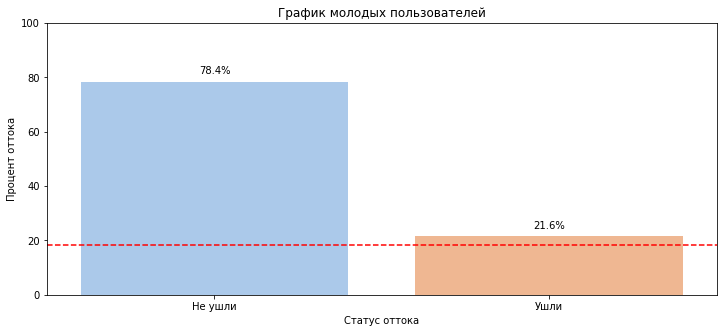

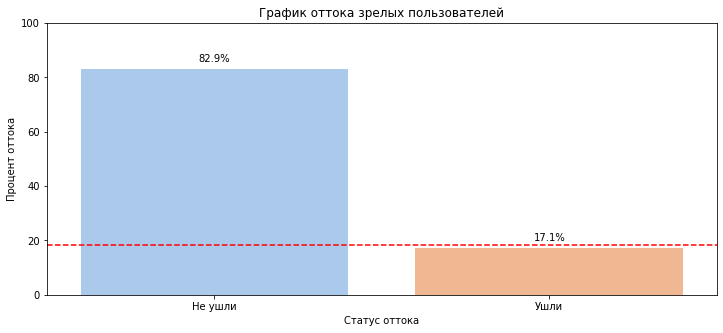

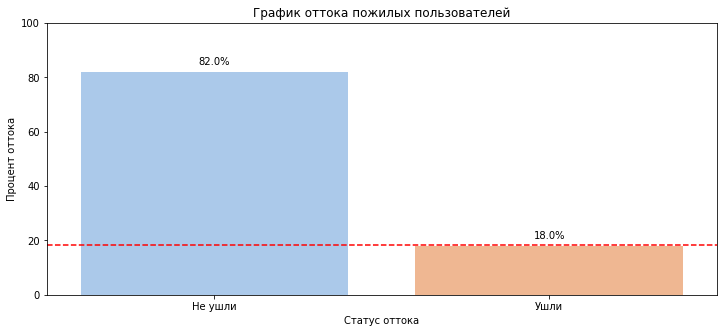

In [91]:
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в низкой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_age_low['percent_of_churn_from_total'], palette='pastel')
plt.title('График молодых пользователей')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_age_low['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в средней категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_age_med['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока зрелых пользователей')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_age_med['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных в высокой категории
sns.barplot(x=['Не ушли', 'Ушли'], y=data_age_hi['percent_of_churn_from_total'], palette='pastel')
plt.title('График оттока пожилых пользователей')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_age_hi['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)


plt.show()


Уходят молодые пользователи до 32 лет, процент оттока 21.

Чаще всего склонны к оттоку пользователи:

- Мужчины (23.7 процента)

- Из Ярославля (19 процентов)

- Что проявлили последнее время активность (24.5 процента)

- Без банковской карты ( 25.6 процента)

- Имеющие на своем счету денег в категории от средней(23) до очень высокой, в высокой и очень высокой категории отток 45 и 45.5 процентов

- Со средней и высокой зарплатой (19  и 19 процентов)

- Имеющие средние кредитные баллы (25 процентов)

- Со средними и высокими баллами собственности ( 27,5 и 36 процентов)

- Со средним и высоким показателем наличия у клиента продуктов банка (28,5 и 62,5 процента)

- В возрасте в категории молодые, до 32 лет с процентом ухода в 21,5 процента.

**3.4. Анализ корреляции признаков** <a id="19"></a> 

Отберем из пункта 3.1 и 3.3 принаки, что влияют на отток сильнее других, и построим графики корреляции между признаком оттока и теми признаками, что были отобраны для расчета. 
Было решено отбирать те значения, где процент оттока выше 20 процентов, так как есть признаки, где процент оттока чуть больше 18 процентов, но учитывая, что есть признаки, где процент влияния очень высок, их можно детально не рассматривать.

**3.4.1 Общая матрица корреляции для всех признаков.** 

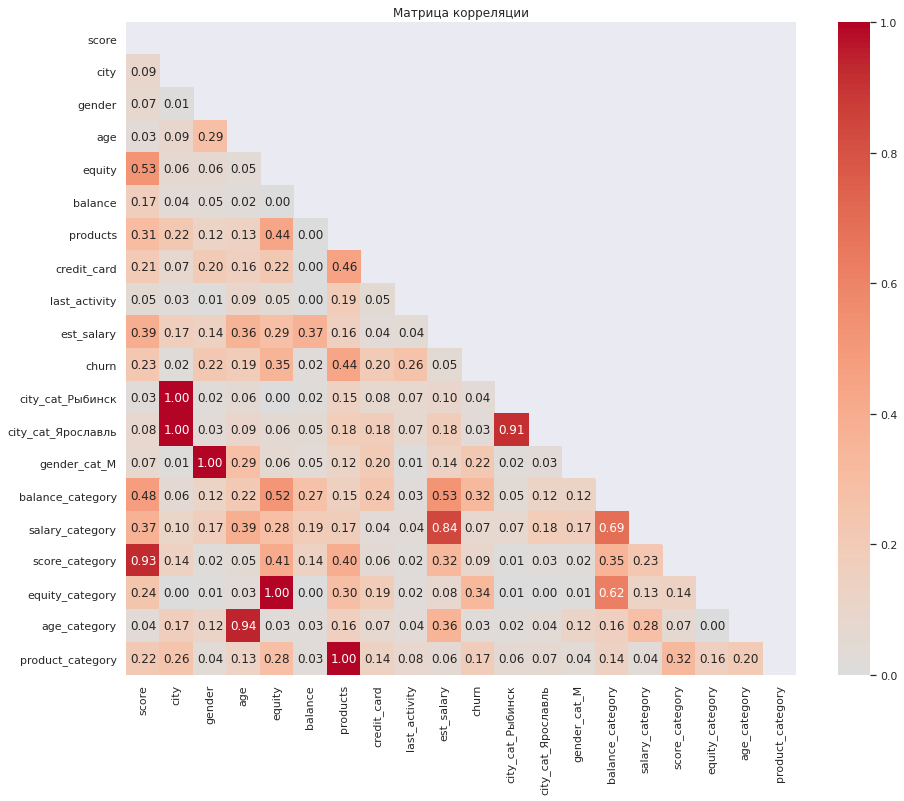

In [92]:
warnings.filterwarnings('ignore')
# Определяем непрерывные признаки:
interval_cols = ['age', 'balance', 'est_salary', 'score', 'equity']

# Исключаем столбец 'user_id' из DataFrame:
data_encoded_matrix = data_encoded.drop('user_id', axis=1, errors='ignore')

# Вычисляем матрицу корреляций с помощью phik_matrix:
corr_matrix = phik_matrix(data_encoded_matrix, interval_cols=interval_cols)

# Устанавливаем размер шрифта и общий размер графика
plt.rc('font', size=10) # Размер шрифта
sns.set(font_scale=1) # Масштабирование шрифтов seaborn


# Создаем маску для верхней части матрицы
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Визуализируем матрицу корреляций с помощью seaborn:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', mask=mask)
plt.title('Матрица корреляции')
plt.show()



Более детально рассмотрим матрицу признаков.

-  Зависимость между полом(мужчинами) и признаком оттока составляет 0.22. Если судить без разбивки на категории, то зависимость так же 0.22.

-  Зависимость между активностью клиентов и оттоком составляет 0.26. Так же проявлена слабо.

-  Зависимость между наличием карты банка и оттоком составляет 0.20. 

-  Зависимость между категориями баланса  и оттоком составляет 0.32, а между балансом, не разделенным на категории, 0.02.

-  Зависимость между категориями кредитных баллов и оттоком равна 0.09, а если не учитывать категории, то 0.23.

-  Зависимость между категориями количества недвижимости в собственности и оттоком равна 0.34, без учета категорий, то 0.35.

-  Зависимость между категориями количества у клиента продуктов банка и оттоком равна 0.17, без учета категорий 0.44.

-  Зависимость между категориями возраста клиентов и оттоком равна 0.03, без учета категорий 0.19.

В итоге, слабая корреляция наблюдается у двух показателей, а именно с показателем количества собственности у клиента, а так же с количеством продуктов банка в пользовании. В остальных признаках она практически не наблюдается.

# Шаг 4. Проверка гипотез <a id="20"></a> 

**4.1 Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.** <a id="21"></a> 

Перед тем, как понять, какой метод использовать для оценки гипотезы,надо понять, являются ли наши данные нормальным распределением. 

Н0: Распределение является нормальным

H1: Распределение не является нормальным

In [93]:
# Получаем данные из двух выборок
data_0 = data_encoded.query('balance <= 2115000 & churn == 0')['balance']
data_1 = data_encoded.query('balance <= 2115000 & churn == 1')['balance']

# Проводим тест Шапиро-Уилка для первой выборки
statistic_0, p_value_0 = stats.shapiro(data_0)
print(f'Тест Шапиро-Уилка для выборки с churn=0:')
print(f'Статистика теста: {statistic_0}')
print(f'p-значение: {p_value_0}')
if p_value_0 < 0.05:
    print('Нулевая гипотеза отвергается: данные не имеют нормальное распределение')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: данные имеют нормальное распределение')
    
# Проводим тест Шапиро-Уилка для второй выборки
statistic_1, p_value_1 = stats.shapiro(data_1)
print('\nТест Шапиро-Уилка для выборки с churn=1:')
print(f'Статистика теста: {statistic_1}')
print(f'p-значение: {p_value_1}')
if p_value_1 < 0.05:
    print('Нулевая гипотеза отвергается: данные не имеют нормальное распределение')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: данные имеют нормальное распределение')

Тест Шапиро-Уилка для выборки с churn=0:
Статистика теста: 0.9127916693687439
p-значение: 0.0
Нулевая гипотеза отвергается: данные не имеют нормальное распределение

Тест Шапиро-Уилка для выборки с churn=1:
Статистика теста: 0.9477466940879822
p-значение: 1.5501872516340084e-23
Нулевая гипотеза отвергается: данные не имеют нормальное распределение


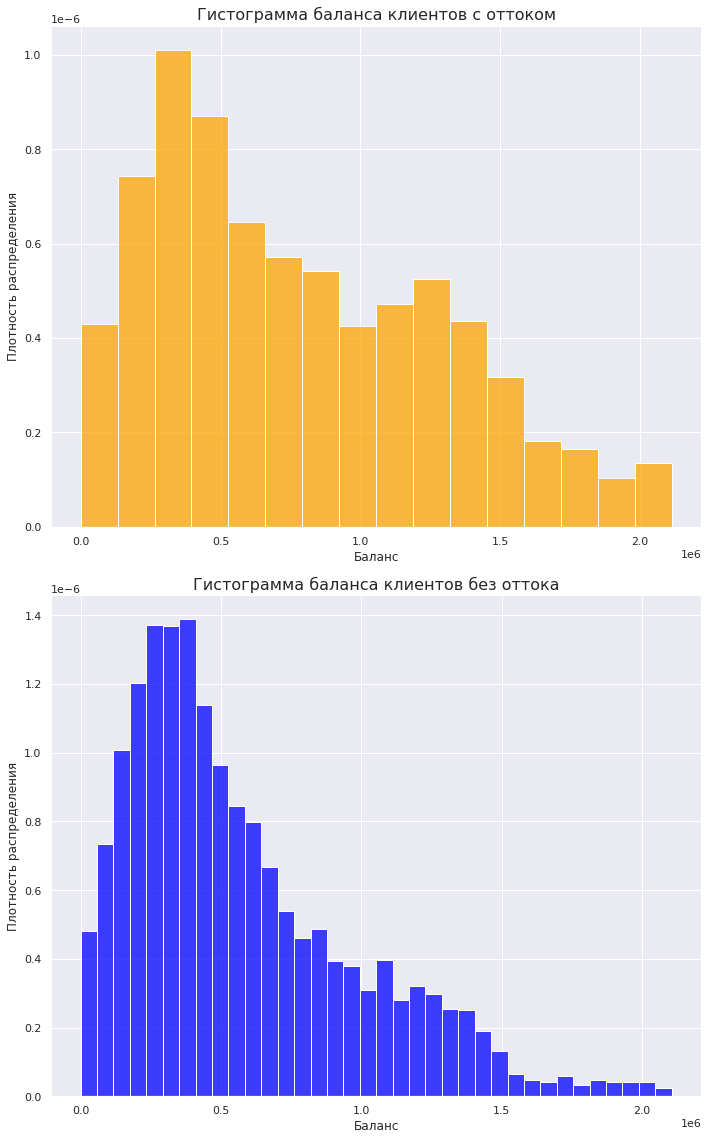

In [94]:
# Создаем область для отображения графиков
fig, axs = plt.subplots(2, 1, figsize=(10, 16))

# Создаем гистограмму для оттока
sns.histplot(data=data_encoded.query('balance <=2115000 & churn == 1'), x='balance', stat='density', common_norm=False, ax=axs[0], color='orange')
axs[0].set_title('Гистограмма баланса клиентов с оттоком', fontsize=16)
axs[0].set_xlabel('Баланс', fontsize=12)
axs[0].set_ylabel('Плотность распределения', fontsize=12)

# Создаем гистограмму для удержания
sns.histplot(data=data_encoded.query('balance <=2115000 & churn == 0'), x='balance', stat='density', common_norm=False, ax=axs[1], color='blue')
axs[1].set_title('Гистограмма баланса клиентов без оттока', fontsize=16)
axs[1].set_xlabel('Баланс', fontsize=12)
axs[1].set_ylabel('Плотность распределения', fontsize=12)

# Размещаем все элементы графиков в компактной форме
plt.tight_layout()

# Отображаем графики
plt.show()

Судя по тесту, распределения не являются нормальными, значит нужен тест Манна- Уитни.

Н0: Между клиентами, что ушли, и клиентами, что остались, нет разницы

Н1: Между клиентами, что ушли, и клиентами, что остались, есть разница.



In [95]:

# Выберем данные для клиентов, которые ушли (churn=1) и остались (churn=0)
data_churn_1 = data_encoded.query('balance <=2115000 & churn == 1')['balance']
data_churn_0 = data_encoded.query('balance <=2115000 & churn == 0')['balance']

# Рассчитаем тест Манна-Уитни
statistic, p_value = stats.mannwhitneyu(data_churn_1, data_churn_0)

# Выведем результаты теста
print(f'Статистика теста Манна-Уитни: {statistic}')
print(f'p-значение: {p_value}')

# Проверим гипотезы
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между клиентами, что ушли, и клиентами, что остались, есть разница')
else:
    print('Принимаем нулевую гипотезу: между клиентами, что ушли, и клиентами, что остались, нет разницы')

Статистика теста Манна-Уитни: 5704350.0
p-значение: 1.3841128179779472e-48
Отвергаем нулевую гипотезу: между клиентами, что ушли, и клиентами, что остались, есть разница


**4.2 Проверим гипотезу различия в среднем возрасте между теми, которые ушли и теми, которые остались.** <a id="22"></a> 

В начале проверим, является ли распределение возраста нормальным.

Н0: Распределение является нормальным

H1: Распределение не является нормальным

In [96]:
# Получаем данные из двух выборок
data_0 = data_encoded.query('churn == 0')['age']
data_1 = data_encoded.query('churn == 1')['age']

# Проводим тест Шапиро-Уилка для первой выборки
statistic_0, p_value_0 = stats.shapiro(data_0)
print(f'Тест Шапиро-Уилка для выборки с churn=0:')
print(f'Статистика теста: {statistic_0}')
print(f'p-значение: {p_value_0}')
if p_value_0 < 0.05:
    print('Нулевая гипотеза отвергается: данные не имеют нормальное распределение')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: данные имеют нормальное распределение')
    
# Проводим тест Шапиро-Уилка для второй выборки
statistic_1, p_value_1 = stats.shapiro(data_1)
print('\nТест Шапиро-Уилка для выборки с churn=1:')
print(f'Статистика теста: {statistic_1}')
print(f'p-значение: {p_value_1}')
if p_value_1 < 0.05:
    print('Нулевая гипотеза отвергается: данные не имеют нормальное распределение')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: данные имеют нормальное распределение')

Тест Шапиро-Уилка для выборки с churn=0:
Статистика теста: 0.9578232169151306
p-значение: 2.1159606811304738e-43
Нулевая гипотеза отвергается: данные не имеют нормальное распределение

Тест Шапиро-Уилка для выборки с churn=1:
Статистика теста: 0.9526705741882324
p-значение: 8.347914636805095e-24
Нулевая гипотеза отвергается: данные не имеют нормальное распределение


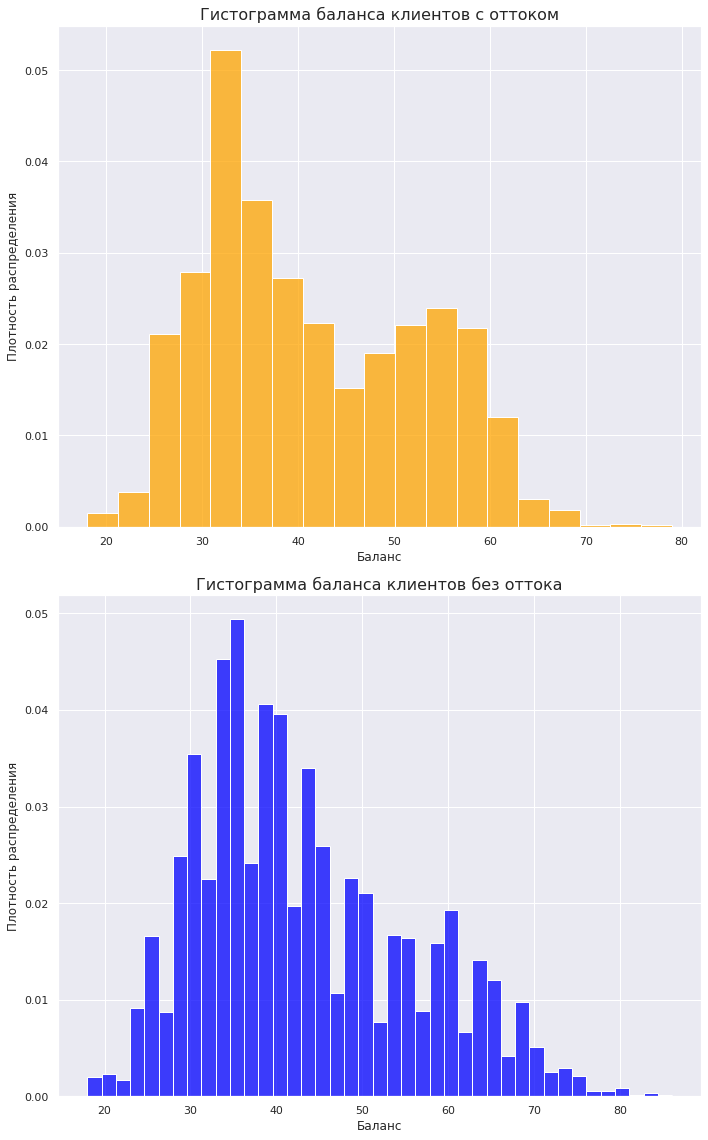

In [97]:
# Создаем область для отображения графиков
fig, axs = plt.subplots(2, 1, figsize=(10, 16))

# Создаем гистограмму для оттока
sns.histplot(data=data_encoded.query('churn == 1'), x='age', stat='density', common_norm=False, ax=axs[0], color='orange')
axs[0].set_title('Гистограмма баланса клиентов с оттоком', fontsize=16)
axs[0].set_xlabel('Баланс', fontsize=12)
axs[0].set_ylabel('Плотность распределения', fontsize=12)

# Создаем гистограмму для удержания
sns.histplot(data=data_encoded.query('churn == 0'), x='age', stat='density', common_norm=False, ax=axs[1], color='blue')
axs[1].set_title('Гистограмма баланса клиентов без оттока', fontsize=16)
axs[1].set_xlabel('Баланс', fontsize=12)
axs[1].set_ylabel('Плотность распределения', fontsize=12)

# Размещаем все элементы графиков в компактной форме
plt.tight_layout()

# Отображаем графики
plt.show()

Судя по тесту, распределения не являются нормальными, значит нужен тест Манна- Уитни.

Н0: Между клиентами, что ушли, и клиентами, что остались, нет разницы в среднем возрасте.

Н1: Между клиентами, что ушли, и клиентами, что остались, есть разница в среднем возрасте.

In [98]:
# Выберем данные о возрасте для клиентов, которые ушли (churn=1) и остались (churn=0)
data_age_churn_1 = data_encoded.query('churn == 1')['age']
data_age_churn_0 = data_encoded.query('churn == 0')['age']

# Рассчитаем тест Манна-Уитни
statistic, p_value = stats.mannwhitneyu(data_age_churn_1, data_age_churn_0)

# Выведем результаты теста
print(f'Статистика теста Манна-Уитни: {statistic}')
print(f'p-значение: {p_value}')

# Уровень значимости
alpha = 0.05

# Проверим гипотезы
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между клиентами, что ушли, и клиентами, что остались, есть разница в среднем возрасте')
else:
    print('Принимаем нулевую гипотезу: между клиентами, что ушли, и клиентами, что остались, нет разницы в среднем возрасте')

Статистика теста Манна-Уитни: 6908213.5
p-значение: 4.576268821627149e-06
Отвергаем нулевую гипотезу: между клиентами, что ушли, и клиентами, что остались, есть разница в среднем возрасте


По результатам проверки гипотез, стоит включить в сегментацию клиентов их возраст, а так же учитывать количество денег на счете в каждой группе.

# Шаг 5. Подведение промежуточных итогов. <a id="23"></a> 

В расчет будем принимать следующие критерии:

- Мужчины

- До 32 лет

- Преимущественно из Ярославля

- Со средней или высокой зарплатой

- Проявляли активность в банке

- Наличием банковской карты

- С наличием у клиента кредитных баллов в средней категории

- С наличием у клиента  баллами собственности в категории выше средней 

- С наличием у клиента продуктов банка в категории выше средней 

- С наличием у клиента денег на счете в категории выше высокой 

На основе этих признаков, которые больше всего влияют на отток, составим 3 сегмента.

# Шаг 6. Сегментация клиентов по критериям.<a id="24"></a> 

Разобьем признаки, озвученные выше, на 4 сегмента: 

**Сегмент 1: Молодые активные клиенты с высокими показателями банковской активности**
- Признаки: Клиенты до 32 лет, проявляющие активность в банке, с наличием банковской карты.

**Сегмент 2: Клиенты со средними показателями кредитных баллов и высоким показателями баллов собственности**
- Признаки: Клиенты из Ярославля с кредитными баллами в средней категории и баллами собственности в категории выше средней.

**Сегмент 3: Клиенты с высоким показателем денег на счете и  высокими баллами собственности**
- Признаки: Клиенты с высоким и более показателем денег на балансе, с высокой или средней зарплатой, с наличием у клиента выше средней категории баллов собственности.

**Сегмент 4: Мужчины клиенты с наличием продуктов банка**
- Признаки: Мужчины, которые имеют продукты банка в категории выше средней.


**6.1 Сегмент 1** <a id="25"></a> 

Клиенты до 32 лет, проявляющие активность в банке, с наличием банковской карты

In [99]:
data_segment1 = data_encoded.query('age_category == "молодые" and last_activity == 1 and credit_card == 1')
data_segment1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category,equity_category,age_category,product_category
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,...,0,1,0,0,None,средний,средний,низкий,молодые,низкий
12,132970,845,Ярославль,Ж,31,3,591928.52,2,1,1,...,1,0,1,0,средний,средний,средний,низкий,молодые,низкий
28,123660,776,Ярославль,М,26,1,49105.63,1,1,1,...,0,0,1,1,низкий,низкий,низкий,низкий,молодые,низкий
33,125478,786,Ростов,Ж,27,3,448062.52,3,1,1,...,0,0,0,0,средний,низкий,низкий,низкий,молодые,средний
45,118849,826,Ярославль,М,31,4,333330.99,1,1,1,...,0,0,1,1,низкий,низкий,низкий,средний,молодые,низкий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,160702,919,Рыбинск,М,26,0,NaN,1,1,1,...,0,1,0,1,None,высокий,высокий,низкий,молодые,низкий
9978,218170,841,Ярославль,М,29,2,235287.10,2,1,1,...,1,0,1,1,низкий,средний,средний,низкий,молодые,низкий
9985,190822,801,Ярославль,М,29,0,34300.30,2,1,1,...,0,0,1,1,низкий,средний,низкий,низкий,молодые,низкий
9990,162357,822,Ярославль,М,31,3,646575.17,1,1,1,...,0,0,1,1,средний,средний,низкий,низкий,молодые,низкий


In [100]:
total_segment1_counts = len(data_segment1)


# Подсчет количества пользователей по полу и оттоку
data_segment1_count = data_segment1.groupby(['churn'])['user_id'].count().reset_index()
data_segment1_count.columns = ['churn', 'count']

data_segment1_count['total'] = total_segment1_counts

# Вывод результирующего DataFrame
data_segment1_count['percent_of_churn_from_total'] = ((data_segment1_count['count'] / 
                                                       total_segment1_counts)*100).round(1)
data_segment1_count

,churn,count,total,percent_of_churn_from_total
0,0,675,875,77.10
1,1,200,875,22.90


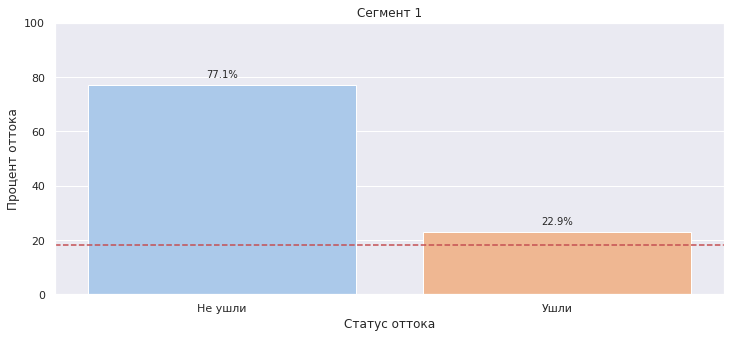

In [101]:

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных
sns.barplot(x=['Не ушли', 'Ушли'], y=data_segment1_count['percent_of_churn_from_total'], palette='pastel')
plt.title('Сегмент 1')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_segment1_count['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


В сегменте 1 отток составляет 23 процента.

**6.2 Сегмент 2** <a id="26"></a> 

Клиенты из Ярославля с кредитными баллами в средней категории и баллами собственности в категории выше средней

In [102]:
data_segment2 = data_encoded.query('score_category == "средний" and  \
(equity_category == "средний" or equity_category == "высокий") and city =="Ярославль"')
data_segment2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category,equity_category,age_category,product_category
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,1,0,1,0,высокий,средний,средний,средний,зрелые,низкий
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,...,0,0,1,1,средний,средний,средний,средний,зрелые,низкий
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,...,0,0,1,1,высокий,высокий,средний,средний,зрелые,низкий
22,161656,871,Ярославль,М,51,4,708866.92,1,1,0,...,0,0,1,1,средний,средний,средний,средний,зрелые,низкий
24,130826,898,Ярославль,Ж,39,5,561906.51,1,1,0,...,0,0,1,0,средний,средний,средний,средний,зрелые,низкий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,167350,882,Ярославль,Ж,46,4,767464.16,2,1,0,...,0,0,1,0,средний,средний,средний,средний,зрелые,низкий
9962,217489,893,Ярославль,Ж,49,5,1571192.11,4,1,1,...,1,0,1,0,высокий,средний,средний,средний,зрелые,высокий
9968,167969,857,Ярославль,Ж,36,5,725371.47,2,1,1,...,0,0,1,0,средний,низкий,средний,средний,зрелые,низкий
9988,158678,889,Ярославль,М,35,4,880534.89,4,1,1,...,0,0,1,1,средний,средний,средний,средний,зрелые,высокий


In [103]:
total_segment2_counts = len(data_segment2)

# Подсчет количества пользователей по полу и оттоку
data_segment2_count = data_segment2.groupby(['churn'])['user_id'].count().reset_index()
data_segment2_count.columns = ['churn', 'count']

data_segment2_count['total'] = total_segment2_counts

# Вывод результирующего DataFrame
data_segment2_count['percent_of_churn_from_total'] = ((data_segment2_count['count'] / 
                                                       total_segment2_counts)*100).round(1)
data_segment2_count

,churn,count,total,percent_of_churn_from_total
0,0,677,1046,64.70
1,1,369,1046,35.30


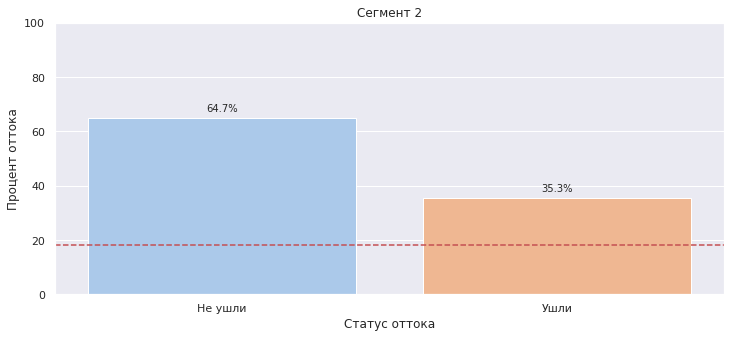

In [104]:

# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных
sns.barplot(x=['Не ушли', 'Ушли'], y=data_segment2_count['percent_of_churn_from_total'], palette='pastel')
plt.title('Сегмент 2')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_segment2_count['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

В сегменте 2 отток составляет 35 процентов.

**6.3 Сегмент 3** <a id="27"></a> 

Клиенты с высоким и более показателем денег на балансе, с высокой или средней зарплатой, с наличием у клиента выше средней категории баллов собственности.

In [105]:
data_segment3 = data_encoded.query('(balance_category == "высокий" or balance_category == "средний") \
 and (equity_category == "средний" or equity_category == "высокий")and (salary_category == "средний" or salary_category == "высокий") ')
data_segment3

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category,equity_category,age_category,product_category
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,1,0,0,средний,средний,средний,средний,зрелые,средний
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,1,0,1,0,высокий,средний,средний,средний,зрелые,низкий
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,...,0,1,0,1,средний,средний,средний,средний,пожилые,средний
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,...,0,0,1,1,средний,средний,высокий,средний,пожилые,низкий
14,172138,815,Ярославль,М,35,5,547499.87,2,1,1,...,0,0,1,1,средний,средний,низкий,средний,зрелые,низкий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,217489,893,Ярославль,Ж,49,5,1571192.11,4,1,1,...,1,0,1,0,высокий,средний,средний,средний,зрелые,высокий
9977,158143,807,Ростов,М,43,4,1124809.48,1,1,1,...,1,0,0,1,средний,высокий,низкий,средний,зрелые,низкий
9981,154871,892,Рыбинск,М,39,5,636287.72,2,0,1,...,1,1,0,1,средний,высокий,средний,средний,зрелые,низкий
9986,152986,822,Ярославль,М,58,5,1434857.91,2,0,1,...,1,0,1,1,высокий,средний,низкий,средний,пожилые,низкий


In [106]:
total_segment3_counts = len(data_segment3)


# Подсчет количества пользователей по полу и оттоку
data_segment3_count = data_segment3.groupby(['churn'])['user_id'].count().reset_index()
data_segment3_count.columns = ['churn', 'count']

data_segment3_count['total'] = total_segment3_counts

# Вывод результирующего DataFrame
data_segment3_count['percent_of_churn_from_total'] = ((data_segment3_count['count'] / 
                                                       total_segment3_counts)*100).round(1)
data_segment3_count

,churn,count,total,percent_of_churn_from_total
0,0,1505,2208,68.20
1,1,703,2208,31.80


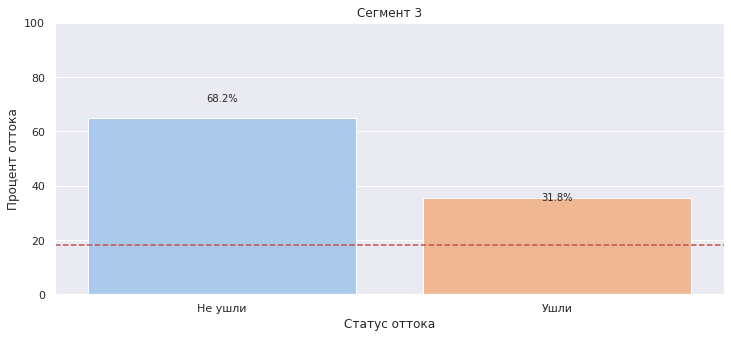

In [107]:
# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных
sns.barplot(x=['Не ушли', 'Ушли'], y=data_segment2_count['percent_of_churn_from_total'], palette='pastel')
plt.title('Сегмент 3')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_segment3_count['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

В сегменте 3 отток составляет 32 процента.

**6.4 Сегмент 4** <a id="28"></a> 

Мужчины, которые имеют продукты банка в категории выше средней.

In [108]:
data_segment4 = data_encoded.query('gender == "М" and (product_category == "средний" or product_category == "высокий") ')
data_segment4

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,city_cat_Рыбинск,city_cat_Ярославль,gender_cat_М,balance_category,salary_category,score_category,equity_category,age_category,product_category
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,...,0,1,0,1,средний,средний,средний,средний,пожилые,средний
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,...,0,1,0,1,высокий,средний,низкий,низкий,зрелые,средний
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,...,1,0,1,1,средний,средний,средний,средний,зрелые,средний
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,...,1,1,0,1,низкий,средний,средний,средний,зрелые,высокий
95,172823,855,Ярославль,М,41,1,312743.28,3,0,0,...,0,0,1,1,низкий,высокий,средний,низкий,зрелые,средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,154435,861,Рыбинск,М,43,4,448896.95,3,0,0,...,0,1,0,1,средний,средний,средний,средний,зрелые,средний
9941,223285,862,Ростов,М,46,3,1784723.84,4,1,1,...,1,0,0,1,высокий,высокий,средний,низкий,зрелые,высокий
9963,187204,957,Ярославль,М,35,4,3431029.03,4,1,0,...,1,0,1,1,очень высокий,очень высокий,высокий,средний,зрелые,высокий
9970,175730,816,Рыбинск,М,36,4,477892.07,3,1,0,...,0,1,0,1,средний,низкий,низкий,средний,зрелые,средний


In [109]:
total_segment4_counts = len(data_segment4)


# Подсчет количества пользователей по полу и оттоку
data_segment4_count = data_segment4.groupby(['churn'])['user_id'].count().reset_index()
data_segment4_count.columns = ['churn', 'count']

data_segment4_count['total'] = total_segment4_counts

# Вывод результирующего DataFrame
data_segment4_count['percent_of_churn_from_total'] = ((data_segment4_count['count'] / 
                                                       total_segment4_counts)*100).round(1)
data_segment4_count

,churn,count,total,percent_of_churn_from_total
0,0,376,752,50.00
1,1,376,752,50.00


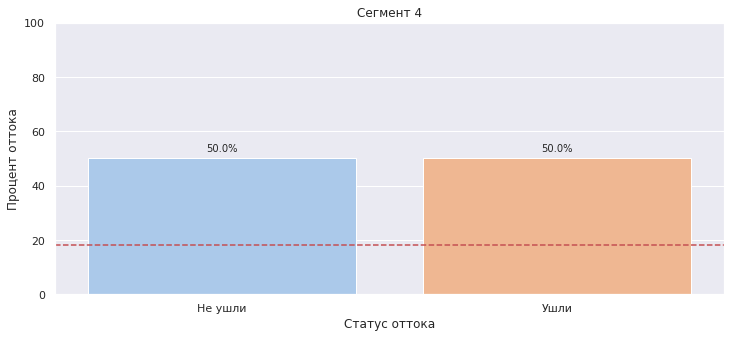

In [110]:
# Создание бар-графика
plt.figure(figsize=(12, 5))
# Добавляем горизонтальную линию
plt.axhline(y=churn_rate, color='r', linestyle='--', label=f'Средний уровень оттока: {churn_rate:.2%}')

# Для неактивных
sns.barplot(x=['Не ушли', 'Ушли'], y=data_segment4_count['percent_of_churn_from_total'], palette='pastel')
plt.title('Сегмент 4')
plt.xlabel('Статус оттока')
plt.ylabel('Процент оттока')
plt.ylim(0, 100)  # Установка предела оси y от 0 до 100

# Добавляем аннотации процентов на каждый столбец
for index, value in enumerate(data_segment4_count['percent_of_churn_from_total']):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

В сегменте 4 отток составляет 50 процентов.

# Шаг 7. Приоритизация сегментов <a id="29"></a> 

При разработке стратегии приоритизации сегментов для отдела маркетинга предложено два пути. 

1.  Исходя из количества отточных клиентов. В таком случае приоритеты будут расставлены так:

 - Сегмент 4
 
 - Сегмент 2
 
 - Сегмент 3
 
 - Сегмент 1
 
 
2.  Исходя из ценности клиента для банка, а именно наличия у клиента большого счета в банке, а так же исходя из его активной позиции в пользовании услугами банка. В таком случае приоритеты будут расставлены так:

 - Сегмент 3
 
 - Сегмент 4
 
 - Сегмент 1
 
 - Сегмент 2

Рекомендовано использовать вторую стратегию, так как ценность клиента для бизнеса важнее.

# Шаг 8. Рекомендации и выводы <a id="30"></a> 

**Шаг 2.**
 - Была проведена переработка данных, сделан их анализ, и были устранены все дефекты, что удалось убрать.

**Шаг 3.**

По итогам EDA были сделаны следующие выводы:

Чаще всего склонны к оттоку пользователи:

- Мужчины (23.7 процента)

- Из Ярославля (19 процентов)

- Что проявлили последнее время активность (24.5 процента)

- Без банковской карты ( 25.6 процента)

- Имеющие на своем счету денег в категории от средней(23) до очень высокой, в высокой и очень высокой категории отток 45 и 45.5 процентов

- Со средней и высокой зарплатой (19  и 19 процентов)

- Имеющие средние кредитные баллы (25 процентов)

- Со средними и высокими баллами собственности ( 27,5 и 36 процентов)

- Со средним и высоким показателем наличия у клиента продуктов банка (28,5 и 62,5 процента)

- В возрасте в категории молодые, до 32 лет с процентом ухода в 21,5 процента.

По итогам матрицы корреляции сделали следующие выводы: 


-  Зависимость между полом(мужчинами) и признаком оттока составляет 0.22. Если судить без разбивки на категории, то зависимость так же 0.22.

-  Зависимость между активностью клиентов и оттоком составляет 0.26.

-  Зависимость между наличием карты банка и оттоком составляет 0.20. 

-  Зависимость между категориями баланса  и оттоком составляет 0.32, а между балансом, не разделенным на категории, 0.02.

-  Зависимость между категориями кредитных баллов и оттоком равна 0.09, а если не учитывать категории, то 0.23.

-  Зависимость между категориями количества недвижимости в собственности и оттоком равна 0.34, без учета категорий, то 0.35.

-  Зависимость между категориями количества у клиента продуктов банка и оттоком равна 0.17, без учета категорий 0.44.

-  Зависимость между категориями возраста клиентов и оттоком равна 0.03, без учета категорий 0.19.

**Шаг 4.**

Проверили гипотезы:

- Между клиентами, что ушли, и клиентами, что остались, есть разница в количестве денег на балансе

- Между клиентами, что ушли, и клиентами, что остались, есть разница в среднем возрасте


**Шаг 6.**

Выделили основые сегменты пользователей на основе полученных данных:


**Сегмент 1: Молодые активные клиенты с высокими показателями банковской активности**


**Сегмент 2: Клиенты со средними показателями кредитных баллов и высоким показателями баллов собственности**


**Сегмент 3: Активыне клиенты с высоким показателем денег на счете и  высокими баллами собственности**


**Сегмент 4: Мужчины клиенты с наличием продуктов банка**


**Шаг 7.** Была задана приоритизация сегментов.

Исходя из ценности клиента для банка, а именно наличия у клиента большого счета в банке, а так же исходя из его активной позиции в пользовании услугами банка, было предложено сделать такую расстановку:

Сегмент 3

Сегмент 4

Сегмент 1

Сегмент 2


**Рекомендации по удержанию каждого сегмента**

*Сегмент 3* 

 - Персонализированный сервис: Обеспечение персонализированного обслуживания и предоставление учебных материалов, которые помогут клиентам лучше управлять своими финансами и инвестициями.
 

- Эксклюзивное привлечение клиентов: Организация эксклюзивных мероприятий, встреч с экспертами и инвестиционными консультациями для активных клиентов с высокими активами и высокой зарплатой, для повышения числа вложенных денег в недвижимость.


- Уделять внимание долгосрочным целям: Помогать клиентам сформулировать и достигать своих долгосрочных финансовых целей, предоставляя индивидуальные инвестиционные стратегии и консультации по вопросам вложения больших средств,отправка уведомлений об актуальных инвестиционных возможностях.

*Сегмент 4* 

- Программы лояльности и привлечения: Разработка программ лояльности и привлечения для стимулирования активного использования продуктов банка, увеличение вовлеченности и удовлетворенности клиентов.


- Бонусы и льготы: Предоставление дополнительных бонусов, скидок и льгот для клиентов, которые имеют продукты банка в категории выше средней, с целью стимулирования дальнейшего использования и удовлетворенности.


- Персонализированный маркетинг: Специализированные предложения и рекламные кампании, адаптированные под клиентов и под их интересы и потребности в продуктах банка с целью увеличения этого числа, а так же для активного использования уже имеющихся.


*Сегмент 1*

- Программы помощи в обучении: Молодым клиентам можно предложить специальные кредитные ставки на учебу или курсы. Это повысит вовлеченность молодых людей в структуру банка.


- Программы помощи в ипотечных кредитах: Сделать программы помощи с льготными ипотечными ставками до определенного возраста для тех, кто активно пользуется продуктами банка и расплачивается его картами.


- Новый вид карт: Выпустить новый вид карт под молоддежную аудиторию, с особыми льготами по этой карте, с нулевым годовым обслуживанием.


- Новые вклады: Разработать новые вклады для молодых клиентов, например ориентированных на накопление степендии, а так же бонусов для клиента, если пользователь открыл новый предложенный вклад.


- Обновление приложения: Разработайте удобное и функциональное обновление мобильного приложениея, которое позволит клиентам управлять своими финансами, получать уведомления о транзакциях и акциях, а также обеспечит легкий доступ к услугам банка, и будет иметь новый, молодежный дизайн.

*Сегмент 2*


- Персонализированные финансовые предложения: Используйте данные о кредитной и финансовой истории клиентов, чтобы предложить им индивидуальные финансовые услуги, кредитные продукты и инвестиционные решения, которые соответствуют их потребностям и целям.


- Улучшение условий кредитования: Предлагайте условия кредитования и ипотечные программы с выгодными процентными ставками и гибкими условиями для клиентов с высокими показателями баллов собственности, чтобы стимулировать их к активному использованию банковских услуг.


- Эксклюзивные привилегии: Создайте специальные программы привилегий и бонусов для клиентов с высокими показателями баллов собственности, такие как скидки на страхование и бесплатные консультации финансовых экспертов.


- Финансовое образование и консультации: Предоставляйте клиентам образовательные материалы и консультации по управлению финансами, инвестированию и планированию будущего, чтобы помочь им принимать осознанные финансовые решения и грамотно строить свои финансовые стратегии.

- Добавить локальные с точки зрения местности проекты: Предложить особые условия для покупки земли или недвижимости в городе Ярославль, можно придумать какие то скидки на взятие кредита в этом регионе, другими словами акцентирование внимания на зоне проживания клиентов и получаемой ими с этого выгоды.



https://disk.yandex.ru/i/bxHOyCCu_XxzeA